 # United States Gun Background Check Data Analysis: 
 ## FBI National Instant Criminal Background Check System and Census Data

### Introduction

For this analysis, I want to see if there is any relationship between background checks for fireams and population demographics in the US. The data being used in my analysis comes from two separate sources. 

The first source is the FBI's National Instant Criminal Background Check System (NICS) which I obtained from the Buzzfeed News GitHub repository (Singer-Vine, 2023). In accordance with the Brady Handgun Violence Prevention Act of 1993, whenever an individual attempts to buy a firearm or explosive from a Federal Firearms Licensee (FFLs), they are checked against the NICS to determine their eligibility to make a purchase. The data was parsed from a PDF document originally provided by the FBI, an of the data falls between the years 1998 and 2017 (FBI, 2016). The NICS data contains background checks for standard gun purchases, as well as checks against private sales, rentals, returns, redemptions, pawned guns, and return to seller transactions. 

The second source of data comes from the US Census Bureau, which I downloaded directly from Udacity. The census data gives a variety of population statistics at the state level including population estimates, age, race, income, education, and several other measurements. All of the data falls between the years 2010 and 2016.

Using both the census and NICS data, I intend to answer three questions. Firstly, I will determine the overall trend of background checks as well as gun sales over time between 2010 and 2016. Secondly, I want to see which states had the highest total amount of background checks and which states experienced the highest growth in background checks between 2010 and 2016. Lastly, I will determine if there is any relationship between the available demographic info and states with more background checks. The demographic statistics I will use include race, age, income, education, veteran status, immigrant status, employment, population density, and population change.

To summarize, I will answer the following questions:

1) What is the overall trend of background checks and gun purchases?
2) Which states have had the highest growth in gun registrations?
3) What census data is most associated with high gun per capita? 

Before I start my analysis, I will need to download all the relevant Python packages to conduct my analyses, specifically Pandas, Matplotlib, Numpy, Seaborn, and Scipy. I will also load in the NICS data and the US Census data by reading their CSV files.

In [172]:
# importing the Python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import pearsonr
%matplotlib inline

# update to the lastest versions of seaborn, pandas, and matplotlib
!pip install --upgrade seaborn
!pip install --upgrade pandas
!pip install --upgrade matplotlib

# suppress warnings from depracated functions
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

df_census=pd.read_csv('u.s.-census-data.csv')
df_gun=pd.read_csv('gun-data.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Data Wrangling and Cleaning

Within the Data Wrangling and Cleaning section, I will familiarize myself with the data and then inspect for duplicates, nulls, or other errant data to be corrected. I will start with wrangling and cleaning the Census data, then move onto the NICS data.

### Census Data Wrangling and Cleaning

Below I will determine the shape of the US Census data as well as the data types of each column and the number duplicated and missing values.

In [173]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2016)",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [174]:
# Reviewing the shape of the data. 
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [175]:
pd.set_option('display.max_rows', None)
print(df_census['Fact'])

0                                               Population estimates, July 1, 2016,  (V2016)
1                                         Population estimates base, April 1, 2010,  (V2016)
2      Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3                                                          Population, Census, April 1, 2010
4                                     Persons under 5 years, percent, July 1, 2016,  (V2016)
5                                              Persons under 5 years, percent, April 1, 2010
6                                    Persons under 18 years, percent, July 1, 2016,  (V2016)
7                                             Persons under 18 years, percent, April 1, 2010
8                                Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9                                          Persons 65 years and over, percent, April 1, 2010
10                                          Female persons, percent,  

There are some problems with the Census data that stand out.

1) All of the columns have strings as the data type, even though the header shows that most of the columns contain numbers. These columns should be converted to int or float types except Fact and Fact Note.

2) Most columns have a non-null count of 65 values, but the Fact column has 80 values and Fact Note has only 28 values. Looking into the Fact column indicates that several rows may contain null data, and I will need to explore the rows with null values to confirm this.

3) The census dataframe shows the states as columns and the facts as rows. Depending on how the NICS data is formatted, I might need to swap the rows and columns in the census dataframe to make it easier to merge data later on in the analysis.

4) Many of the entries in the Fact column are very long names, and I will need to shorten most of them if I want to use them in our analysis later. I may need to drop certain columns and rows that are not relevant to my analysis.

First we will check to see how many duplicated rows are in the dataframe.

In [176]:
# How many duplicates are there in the census data frame
df_census.duplicated().sum()

3

In [177]:
# Seeing where duplicates existed within the data frame
df_census[df_census.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Because these 3 duplicate rows contain only null values, I can safely drop these rows from the dataframe.

In [178]:
#droping duplicates within the data frame
df_census.drop_duplicates(inplace=True)

In [179]:
# confirming no more duplicates exist
df_census.duplicated().sum()

0

Looking into the original CSV file shows FIPS Code does not contain any useful information for analysis, and that every row below FIPS Code contains null values for every state. I can safely remove these rows from the dataframe as well.

In [180]:
#drop rows because they were notes from whoever was collecting data and there was significant null values from it. 
df_census.drop(df_census.index[64:85], axis=0,inplace=True)

In [181]:
#confirm that rows 64 to 85 was deleted
df_census.index[55:85]

Index([55, 56, 57, 58, 59, 60, 61, 62, 63], dtype='int64')

In [182]:
# confirm that FIPS Code and every row below has been dropped
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749","538,893","38,510","130,973","795,129","405,090","236,561","204,562","296,155","277,676","131,322","314,902","499,959","657,237","428,716","155,094","415,972","102,746","144,122","144,944","121,297","533,808",83857,1248304,603182,62271,759569,249027,285028,818858,77042,276269,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756","96,787","11,148","12,804","89,110","45,174","25,889","21,610","33,208","42,211","15,689","50,976","58,339","71,861","45,582","26,789","49,217","11,486","16,693","23,049","16,119","57,996",14096,137532,86571,6584,91316,36273,30918,97969,9904,47987,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686","800,585","101,334","124,314","1,006,885","412,543","217,779","203,401","282,704","354,460","115,839","462,232","525,667","733,517","419,628","198,566","415,542","93,393","137,254","191,293","108,817","707,975",128693,1811544,684743,56904,776193,273491,288790,837792,79837,303137,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,211.8,19,231.1,181,54.5,34.9,109.9,104.9,43.1,594.8,839.4,174.8,66.6,63.2,87.1,6.8,23.8,24.6,147,"1,195.50",17,411.2,196.1,9.7,282.3,54.7,39.9,283.9,1018.1,153.9,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76","57,513.49","6,422.63","82,643.12","55,518.93","35,826.11","55,857.13","81,758.72","39,486.34","43,203.90","30,842.92","9,707.24","7,800.06","56,538.90","79,626.74","46,923.27","68,741.52","145,545.80","76,824.17","109,781.18","8,952.65","7,354.22",121298.15,47126.4,48617.91,69000.8,40860.69,68594.92,95988.01,44742.7,1033.81,30060.7,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


Since the Fact Note column contains no data that can be easily analyzed, I will drop this column.

In [183]:
# drop the column named Fact Note
df_census.drop('Fact Note', axis=1, inplace=True)

In [184]:
# confirm that Fact Note column was dropped
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Now, I will confirm that there are no more missing values after completing the previous removals.

In [185]:
missing_values_count =  df_census.isnull().sum()
print(missing_values_count)

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


Since it will make future analysis easier to have Facts as the columns and States as the rows, I will transpose the rows and columns of the Census dataframe.

In [186]:
# Transpose the DataFrame where rows are headers and the states are rows
df_census = df_census.transpose()
df_census.reset_index(inplace=True)

# confirm that transposing the columns and rows was successful
df_census.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%

I need to rename the column names to the values in the Fact row to make analysis of census variables more clear in the future.

In [187]:
# Set the first row as the column headers
df_census.columns = df_census.iloc[0]

df_census.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, 

In [188]:
# Drop the first row since it is now the header
df_census = df_census.drop(df_census.index[0]).reset_index(drop=True)
df_census.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.8

Now, I will begin to drop all columns not relevant to my analysis.

In [189]:
# Print the actual column names of df_census to identify which ones to drop
print(df_census.columns)

Index(['Fact', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 201

In [190]:
# Drop all unnecessary columns
df_census.drop([
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Housing units,  July 1, 2016,  (V2016)',
       'Housing units, April 1, 2010',
       'Owner-occupied housing unit rate, 2011-2015',
       'Median value of owner-occupied housing units, 2011-2015',
       'Median selected monthly owner costs -with a mortgage, 2011-2015',
       'Median selected monthly owner costs -without a mortgage, 2011-2015',
       'Median gross rent, 2011-2015', 'Building permits, 2016',
       'Households, 2011-2015', 'Persons per household, 2011-2015',
       'Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015',
       'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
       'In civilian labor force, total, percent of population age 16 years+, 2011-2015',
       'In civilian labor force, female, percent of population age 16 years+, 2011-2015',
       'Total accommodation and food services sales, 2012 ($1,000)',
       'Total manufacturers shipments, 2012 ($1,000)',
       'Total merchant wholesaler sales, 2012 ($1,000)', 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Total retail sales, 2012 ($1,000)',
       'Total retail sales per capita, 2012','White alone, percent, July 1, 2016,  (V2016)',
       'Mean travel time to work (minutes), workers age 16 years+, 2011-2015',
       'Total nonemployer establishments, 2015', 'All firms, 2012',
       'Men-owned firms, 2012', 'Women-owned firms, 2012', 'Total employment, percent change, 2014-2015',
       'Minority-owned firms, 2012', 'Nonminority-owned firms, 2012', 'Persons  without health insurance, under age 65 years, percent',
       'Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012','Persons in poverty, percent','Total health care and social assistance receipts/revenue, 2012 ($1,000)',
       'Land area in square miles, 2010','Total nonemployer establishments, 2015','Total employer establishments, 2015', 'Total annual payroll, 2015 ($1,000)'], axis=1, inplace=True)

In [191]:
# Confirm the dropped columns
df_census.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Total employment, 2015","Population per square mile, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,22.60%,23.70%,26.80%,0.70%,1.40%,4.20%,65.80%,"363,170",3.50%,84.30%,23.50%,11.80%,"$43,623","$24,091","1,634,391",94.4
1,Alaska,"741,894","710,249",4.50%,25.20%,26.40%,3.80%,15.20%,6.30%,7.00%,61.20%,"69,323",7.40%,92.10%,28.00%,8.10%,"$72,515","$33,413","267,999",1.2
2,Arizona,"6,931,071","6,392,301",8.40%,23.50%,25.50%,4.90%,5.40%,3.40%,30.90%,55.50%,"505,794",13.50%,86.00%,27.50%,8.20%,"$50,255","$25,848","2,295,186",56.3
3,Arkansas,"2,988,248","2,916,025",2.50%,23.60%,24.40%,15.70%,1.00%,1.60%,7.30%,72.90%,"220,953",4.70%,84.80%,21.10%,12.30%,"$41,371","$22,798","1,003,113",56
4,California,"39,250,017","37,254,522",5.40%,23.20%,25.00%,6.50%,1.70%,14.80%,38.90%,37.70%,"1,777,410",27.00%,81.80%,31.40%,6.80%,"$61,818","$30,318","14,325,377",239.1


To reduce the wordiness of the census variables, I will rename all of the remaining column names to be shorter.

In [192]:
# Print the remaining columns
print(df_census.columns)

Index(['Fact', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       'Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015',
       'With a disability, under age 65 years, percent, 2011

In [193]:
# Rename each of the remaining columns
df_census.rename(columns={
    'Fact': 'state','Population estimates, July 1, 2016,  (V2016)': 'Population_estimate_2016', 
    'Population estimates base, April 1, 2010,  (V2016)': 'Population_estimate_2010',
    'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)': 'Percent_population_change_2010-2016',
    'Persons under 18 years, percent, July 1, 2016,  (V2016)': 'Percent_population_under_18_years_old_2016',
    'Persons under 18 years, percent, April 1, 2010': 'Percent_population_under_18_years_old_2010',
    'Black or African American alone, percent, July 1, 2016,  (V2016)': 'Percent_black_2016',
    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)': 'Percent_indigenous_2016',
    'Asian alone, percent, July 1, 2016,  (V2016)': 'Percent_asian_2016',
    'Hispanic or Latino, percent, July 1, 2016,  (V2016)': 'Percent_hispanic_2016',
    'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)': 'Percent_white_2016',
    'Veterans, 2011-2015': 'Veteran_2011-2015',
    'Foreign born persons, percent, 2011-2015': 'Percent_immigrant_2011-2015',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015': 'Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015',
    'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015': 'Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015',
    'With a disability, under age 65 years, percent, 2011-2015': 'Percent_disability_under_65_years_old_2011-2015',
    'Median household income (in 2015 dollars), 2011-2015': 'Median_household_income_2011-2015_dollars',
    'Per capita income in past 12 months (in 2015 dollars), 2011-2015': 'Per_capita_income_last_12_months_2011-2015_dollars',
    'Total employment, 2015': 'Total_employment_2015',
    'Population per square mile, 2010': 'Population_density_2010'}, inplace=True)


In [194]:
# Confirm the column name changes
df_census.head()

,state,Population_estimate_2016,Population_estimate_2010,Percent_population_change_2010-2016,Percent_population_under_18_years_old_2016,Percent_population_under_18_years_old_2010,Percent_black_2016,Percent_indigenous_2016,Percent_asian_2016,Percent_hispanic_2016,Percent_white_2016,Veteran_2011-2015,Percent_immigrant_2011-2015,Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_disability_under_65_years_old_2011-2015,Median_household_income_2011-2015_dollars,Per_capita_income_last_12_months_2011-2015_dollars,Total_employment_2015,Population_density_2010
0,Alabama,"4,863,300","4,780,131",1.70%,22.60%,23.70%,26.80%,0.70%,1.40%,4.20%,65.80%,"363,170",3.50%,84.30%,23.50%,11.80%,"$43,623","$24,091","1,634,391",94.4
1,Alaska,"741,894","710,249",4.50%,25.20%,26.40%,3.80%,15.20%,6.30%,7.00%,61.20%,"69,323",7.40%,92.10%,28.00%,8.10%,"$72,515","$33,413","267,999",1.2
2,Arizona,"6,931,071","6,392,301",8.40%,23.50%,25.50%,4.90%,5.40%,3.40%,30.90%,55.50%,"505,794",13.50%,86.00%,27.50%,8.20%,"$50,255","$25,848","2,295,186",56.3
3,Arkansas,"2,988,248","2,916,025",2.50%,23.60%,24.40%,15.70%,1.00%,1.60%,7.30%,72.90%,"220,953",4.70%,84.80%,21.10%,12.30%,"$41,371","$22,798","1,003,113",56
4,California,"39,250,017","37,254,522",5.40%,23.20%,25.00%,6.50%,1.70%,14.80%,38.90%,37.70%,"1,777,410",27.00%,81.80%,31.40%,6.80%,"$61,818","$30,318","14,325,377",239.1


Now that I've filtered the dataframe to only include the variables of interest to me, I need to convert the data types for all columns to the data type float, except state which will remain a string. As shown above, many of these columns contain values with non-numeric symbols like "$", "%", and "," so I will need to replace these symbols with "" in order to convert them to float.

The percentages will need to be divided by 100, and so I will need to use an if/else statement to change the percentages separately from the remaining symbols. Because some values in the percentage columns are decimal values and not percentage values, I will not divide those by 100.

In [195]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   state                                                                   50 non-null     object
 1   Population_estimate_2016                                                50 non-null     object
 2   Population_estimate_2010                                                50 non-null     object
 3   Percent_population_change_2010-2016                                     50 non-null     object
 4   Percent_population_under_18_years_old_2016                              50 non-null     object
 5   Percent_population_under_18_years_old_2010                              50 non-null     object
 6   Percent_black_2016                                                      50 non-null     obje

In [196]:
# Convert all values except for the state from object to float 
# Remove symbols and replace them with ''

df_census
for col in range(1, len(df_census.columns)):
    for row in range(len(df_census.index)):
        if df_census.iloc[row, col].endswith('%'):
            # Divide percentage values by 100 after removing the %
            df_census.iloc[row, col] = float(df_census.iloc[row, col].replace('%', '')) / 100.
        else:
            df_census.iloc[row, col] = float(df_census.iloc[row, col].replace('$', '').replace(',', ''))

In [197]:
# Confirm that the data types have been changed
df_census

,state,Population_estimate_2016,Population_estimate_2010,Percent_population_change_2010-2016,Percent_population_under_18_years_old_2016,Percent_population_under_18_years_old_2010,Percent_black_2016,Percent_indigenous_2016,Percent_asian_2016,Percent_hispanic_2016,Percent_white_2016,Veteran_2011-2015,Percent_immigrant_2011-2015,Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_disability_under_65_years_old_2011-2015,Median_household_income_2011-2015_dollars,Per_capita_income_last_12_months_2011-2015_dollars,Total_employment_2015,Population_density_2010
0,Alabama,4863300.0,4780131.0,0.017,0.226,0.237,0.268,0.007,0.014,0.042,0.658,363170.0,0.035,0.843,0.235,0.118,43623.0,24091.0,1634391.0,94.4
1,Alaska,741894.0,710249.0,0.045,0.252,0.264,0.038,0.152,0.063,0.07,0.612,69323.0,0.074,0.921,0.28,0.081,72515.0,33413.0,267999.0,1.2
2,Arizona,6931071.0,6392301.0,0.084,0.235,0.255,0.049,0.054,0.034,0.309,0.555,505794.0,0.135,0.86,0.275,0.082,50255.0,25848.0,2295186.0,56.3
3,Arkansas,2988248.0,2916025.0,0.025,0.236,0.244,0.157,0.01,0.016,0.073,0.729,220953.0,0.047,0.848,0.211,0.123,41371.0,22798.0,1003113.0,56.0
4,California,39250017.0,37254522.0,0.054,0.232,0.25,0.065,0.017,0.148,0.389,0.377,1777410.0,0.27,0.818,0.314,0.068,61818.0,30318.0,14325377.0,239.1
5,Colorado,5540545.0,5029324.0,0.102,0.228,0.244,0.045,0.016,0.033,0.213,0.686,391725.0,0.098,0.907,0.381,0.072,60629.0,32217.0,2253795.0,48.5
6,Connecticut,3576452.0,3574114.0,0.001,0.211,0.229,0.118,0.005,0.047,0.157,0.677,199331.0,0.139,0.899,0.376,0.071,70331.0,38803.0,1503102.0,738.1
7,Delaware,952065.0,897936.0,0.06,0.215,0.229,0.226,0.006,0.04,0.092,0.629,71213.0,0.087,0.884,0.3,0.085,60509.0,30554.0,397385.0,460.8
8,Florida,20612439.0,18804592.0,0.096,0.201,0.213,0.168,0.005,0.029,0.249,0.549,1507738.0,0.197,0.869,0.273,0.085,47507.0,26829.0,7777990.0,350.6
9,Georgia,10310371.0,9688680.0,0.064,0.244,0.257,0.32,0.005,0.041,0.094,0.534,670617.0,0.098,0.854,0.288,0.088,49620.0,25737.0,3692490.0,168.4


In [198]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   state                                                                   50 non-null     object
 1   Population_estimate_2016                                                50 non-null     object
 2   Population_estimate_2010                                                50 non-null     object
 3   Percent_population_change_2010-2016                                     50 non-null     object
 4   Percent_population_under_18_years_old_2016                              50 non-null     object
 5   Percent_population_under_18_years_old_2010                              50 non-null     object
 6   Percent_black_2016                                                      50 non-null     obje

The data type is still showing as a string despite the conversion. I will now use the pd.to_numeric() function to ensure that each column is converted to a float.

In [199]:
# Convert object datatype to floats
for col in df_census.columns[1:]:
    df_census[col] = pd.to_numeric(df_census[col])

In [200]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   state                                                                   50 non-null     object 
 1   Population_estimate_2016                                                50 non-null     float64
 2   Population_estimate_2010                                                50 non-null     float64
 3   Percent_population_change_2010-2016                                     50 non-null     float64
 4   Percent_population_under_18_years_old_2016                              50 non-null     float64
 5   Percent_population_under_18_years_old_2010                              50 non-null     float64
 6   Percent_black_2016                                                      50 non-null 

Since all of the columns except state have been converted to float now, I can print descriptive statistics for the dataframe to make sure the data looks how I expect it to.

In [201]:
df_census.describe()

,Population_estimate_2016,Population_estimate_2010,Percent_population_change_2010-2016,Percent_population_under_18_years_old_2016,Percent_population_under_18_years_old_2010,Percent_black_2016,Percent_indigenous_2016,Percent_asian_2016,Percent_hispanic_2016,Percent_white_2016,Veteran_2011-2015,Percent_immigrant_2011-2015,Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_disability_under_65_years_old_2011-2015,Median_household_income_2011-2015_dollars,Per_capita_income_last_12_months_2011-2015_dollars,Total_employment_2015,Population_density_2010
count,5.000000e+01,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,6.448927e+06,6.163127e+06,0.041800,0.22750,0.238820,0.110240,0.019980,0.04342,0.11714,0.693200,4.015940e+05,0.089620,0.882240,0.29012,0.090620,54311.860000,28491.780000,2.471459e+06,194.962000
std,7.271769e+06,6.848463e+06,0.033811,0.01977,0.019075,0.096319,0.030651,0.05562,0.10326,0.156635,3.831585e+05,0.060841,0.030896,0.04934,0.018291,8949.529115,4103.284534,2.733595e+06,261.091465
min,5.855010e+05,5.637670e+05,-0.012000,0.19000,0.207000,0.006000,0.002000,0.00800,0.01500,0.221000,4.470800e+04,0.015000,0.818000,0.19200,0.065000,39665.000000,21057.000000,2.198810e+05,1.200000
25%,1.850106e+06,1.833003e+06,0.016250,0.21650,0.226750,0.036250,0.005000,0.01725,0.05000,0.595500,1.332715e+05,0.044000,0.856000,0.25950,0.077500,47526.000000,25443.750000,5.888890e+05,44.450000
50%,4.559320e+06,4.436412e+06,0.040500,0.22750,0.237000,0.082000,0.007500,0.02850,0.09200,0.729500,3.020175e+05,0.067500,0.888500,0.28200,0.087000,52601.000000,27669.500000,1.606934e+06,98.750000
75%,7.198768e+06,6.680362e+06,0.063750,0.23675,0.248000,0.155250,0.016000,0.04775,0.13550,0.803750,4.949490e+05,0.133750,0.908500,0.31775,0.101750,60599.000000,30977.000000,3.040622e+06,209.500000
max,3.925002e+07,3.725452e+07,0.127000,0.30200,0.315000,0.377000,0.152000,0.37700,0.48500,0.935000,1.777410e+06,0.270000,0.928000,0.40500,0.144000,74551.000000,38803.000000,1.432538e+07,1195.500000


Now that the df_census data is ready to be analyzed, I will move on to wrangling and cleaning the NICS data.

### Gun Data Wrangling and Cleaning

Below I will determine the shape of the NICS data as well as the data types of each column and the number duplicated and missing values.

In [202]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [203]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

There are some problems with the NICS data that stand out.

1) There are a few columns that have the data type int, multiple and totals, while the rest of the columns are float (except month and state). These columns should be converted to float as well so that they are consistent with the other numeric columns. The month column is also listed as a string data type, so I will need to convert it to datetime before it can be used.

2) There are 12485 non-null values for the df_gun dataset, but only the month, state, and totals columns also have 12485 while the remaining columns have less. In some columns the total number of non-null values is below 1000. It would make sense if there were months where some states had no records or background checks for certain types of gun transactions. As long as the month, state, and total columns have no null values, then I shouldn't need to drop any rows with null values for other columns. If there are any missing values, I can update them with 0 in order to make statistical calculations during the exploration section.

3) It's not clear whether the number of unique states in the NICS data is the same as out Census data. If the number is unequal, that will make it more difficult when merging the two datasets together later. I will need to check to see if the number of states is equal between these datasets drop the states they don't have in common if necessary.

First I will check to see how many duplicated rows are in the dataframe.

In [204]:
# Check for the number of duplicated rows
df_gun.duplicated().sum()

0

Next I will convert the month, multiple, totals columns to the correct data types.

In [205]:
# Convert multiple and totals data types to float
df_gun['multiple']=df_gun['multiple'].astype(float)
df_gun['totals']=df_gun['totals'].astype(float)

# Convert month data type to datetime
df_gun['month']=pd.to_datetime(df_gun['month'])

In [206]:
# Confirm the data type changes
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

Let's look at the descriptive statistics for df_gun to make sure that none of the statistics indicate a problem with the data.

In [207]:
df_gun.describe()

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,10545.000000,10544.000000,5115.000000,2200.000000,2145.000000,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,2008-03-31 23:47:18.766519808,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
min,1998-11-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003-07-01 00:00:00,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,2008-04-01 00:00:00,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,39.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,2013-01-01 00:00:00,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,561.000000,872.000000,2.000000,16.000000,4.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,2017-09-01 00:00:00,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000
std,NaN,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,783.467053,952.144809,4.574641,81.943020,22.097046,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387


None of the minimum values for any columns are less than 0, and there are no statistical values greater than the max for each column. There does not appear to be anything wrong with the summary statistics.

Now, I would like to extract the year from the month column for my analysis later.

In [208]:
# Extract the year from the month and make it a new column in the data frame.
df_gun['year'] = df_gun['month'].dt.year

In [209]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

The year has been extracted, but it currently has the int data type rather than datetime. I will make the conversion in the next step.

In [210]:
# Convert year to the data type datetime
df_gun['year'] = pd.to_datetime(df_gun['year'], format='%Y')

In [211]:
# Confirm that year has been changed to data type datetime
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

Now I will check to compare the number of unique states between the Census and NICS datasets.

In [212]:
df_gun['state'].unique().tolist()

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Mariana Islands',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [213]:
# Print the number of unique states in NICS data
unique_state_count = len(df_gun['state'].unique())
print(unique_state_count)

55


In [214]:
# Print the number of unique states in Census data
unique_state_count = len(df_census['state'].unique())
print(unique_state_count)

50


There are 5 more states in the NICS data compared to the Census data. I want to make sure I can compare the state columns in both data frames. I need to determine which states are unique to the NICS data and drop all rows containing those states. 

In [215]:
# I need to make sure there are no extra states. 

# Extract unique states from both DataFrames
gun_states = set(df_gun['state'].unique())
census_states = set(df_census['state'].unique())

# Find states that are in both DataFrames (intersection)
common_states = sorted(list(gun_states.intersection(census_states)))

# Find states that are only in gun_df but not in census_df
states_only_in_df_gun = sorted(list(gun_states.difference(census_states)))

# Find states that are only in census_df but not in gun_df
states_only_in_df_census = sorted(list(census_states.difference(gun_states)))

# Function to print a numbered list
def print_numbered_list(title, items):
    print(title)
    for idx, item in enumerate(items, start=1):
        print(f"{idx}. {item}")
    print()  # Empty line for better readability

# Output the results
print_numbered_list("Common states in both DataFrames:", common_states)
print_numbered_list("States only in gun_df:", states_only_in_df_gun)
print_numbered_list("States only in census_df:", states_only_in_df_census)


Common states in both DataFrames:
1. Alabama
2. Alaska
3. Arizona
4. Arkansas
5. California
6. Colorado
7. Connecticut
8. Delaware
9. Florida
10. Georgia
11. Hawaii
12. Idaho
13. Illinois
14. Indiana
15. Iowa
16. Kansas
17. Kentucky
18. Louisiana
19. Maine
20. Maryland
21. Massachusetts
22. Michigan
23. Minnesota
24. Mississippi
25. Missouri
26. Montana
27. Nebraska
28. Nevada
29. New Hampshire
30. New Jersey
31. New Mexico
32. New York
33. North Carolina
34. North Dakota
35. Ohio
36. Oklahoma
37. Oregon
38. Pennsylvania
39. Rhode Island
40. South Carolina
41. South Dakota
42. Tennessee
43. Texas
44. Utah
45. Vermont
46. Virginia
47. Washington
48. West Virginia
49. Wisconsin
50. Wyoming

States only in gun_df:
1. District of Columbia
2. Guam
3. Mariana Islands
4. Puerto Rico
5. Virgin Islands

States only in census_df:



In [216]:
#Drop the rows where states only apprear in gun_df
df_gun = df_gun[~df_gun['state'].isin(states_only_in_df_gun)]
df_gun['state'].unique().tolist()

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

Let's check the shape of the df_gun dataframe to see that the removal of the extra states was successful.

In [217]:
# Check the state removal was successful
df_gun.shape

(11350, 28)

Now, I will fill the missing values in my dataframe with 0 to make calculations easier.

In [218]:
missing_values_count =  df_gun.isnull().sum()
print(missing_values_count)

month                            0
state                            0
permit                           2
permit_recheck               10350
handgun                          0
long_gun                         0
other                         6350
multiple                         0
admin                            2
prepawn_handgun               1753
prepawn_long_gun              1755
prepawn_other                 6700
redemption_handgun            1750
redemption_long_gun           1752
redemption_other              6700
returned_handgun              9350
returned_long_gun             9400
returned_other                9700
rentals_handgun              10450
rentals_long_gun             10600
private_sale_handgun          8850
private_sale_long_gun         8850
private_sale_other            8850
return_to_seller_handgun      9100
return_to_seller_long_gun     8850
return_to_seller_other        9300
totals                           0
year                             0
dtype: int64


In [219]:
df_gun.fillna(0, inplace=True)

In [220]:
missing_values_count =  df_gun.isnull().sum()
print(missing_values_count)

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
year                         0
dtype: int64


Let's check that all the columns have the same count of non-null values.

In [221]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11350 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      11350 non-null  datetime64[ns]
 1   state                      11350 non-null  object        
 2   permit                     11350 non-null  float64       
 3   permit_recheck             11350 non-null  float64       
 4   handgun                    11350 non-null  float64       
 5   long_gun                   11350 non-null  float64       
 6   other                      11350 non-null  float64       
 7   multiple                   11350 non-null  float64       
 8   admin                      11350 non-null  float64       
 9   prepawn_handgun            11350 non-null  float64       
 10  prepawn_long_gun           11350 non-null  float64       
 11  prepawn_other              11350 non-null  float64       
 12  redemptio

There are no missing values in any of the columns. We can conclude the cleaning section and begin to perform data exploration and analysis.

# Data Analysis

### What is the overall trend of background checks and gun purchases?

To find what the trend for background check is, I need to identify which of my columns I will use as the measure for background checks. I will use the totals column, because it is the sum of all firearm background checks for each row in the dataset.

I want to look at the background check trends first by year and then by month. To do this, I need to determine how many years begin in January and end in December to avoid analyzing any incomplete years.

In [222]:
# I will need to remove the years 1998 and 2017 because they are not full year
print(df_gun['month'].unique())

<DatetimeArray>
['2017-09-01 00:00:00', '2017-08-01 00:00:00', '2017-07-01 00:00:00',
 '2017-06-01 00:00:00', '2017-05-01 00:00:00', '2017-04-01 00:00:00',
 '2017-03-01 00:00:00', '2017-02-01 00:00:00', '2017-01-01 00:00:00',
 '2016-12-01 00:00:00',
 ...
 '1999-08-01 00:00:00', '1999-07-01 00:00:00', '1999-06-01 00:00:00',
 '1999-05-01 00:00:00', '1999-04-01 00:00:00', '1999-03-01 00:00:00',
 '1999-02-01 00:00:00', '1999-01-01 00:00:00', '1998-12-01 00:00:00',
 '1998-11-01 00:00:00']
Length: 227, dtype: datetime64[ns]


Since the dataset begins with November 1998 and ends with September 2017, I will filter out any rows with years 1998 and 2017 from my yearly analysis.

In [223]:
# Filter the dataFrame for full years between 1999 and 2016 
# Because year is in DateTime, I can query using full dates

df_gun_full_years = df_gun.query('year >= "1999-01-01" & year <= "2016-12-31"')


In [224]:
# Sum the totals column and group by year
total_backgroundchecks_yearly = df_gun_full_years.groupby('year')['totals'].sum()
print(total_backgroundchecks_yearly)

year
1999-01-01     9038315.0
2000-01-01     8421486.0
2001-01-01     8812457.0
2002-01-01     8358574.0
2003-01-01     8393942.0
2004-01-01     8571726.0
2005-01-01     8857599.0
2006-01-01     9982755.0
2007-01-01    11151998.0
2008-01-01    12684240.0
2009-01-01    13974323.0
2010-01-01    14309926.0
2011-01-01    16323039.0
2012-01-01    19446504.0
2013-01-01    20946761.0
2014-01-01    20840268.0
2015-01-01    23006228.0
2016-01-01    27405549.0
Name: totals, dtype: float64


Now that I've filtered my df_gun dataframe to only include full years, I will plot a line chart that visualizes total yearly gun background checks by year.

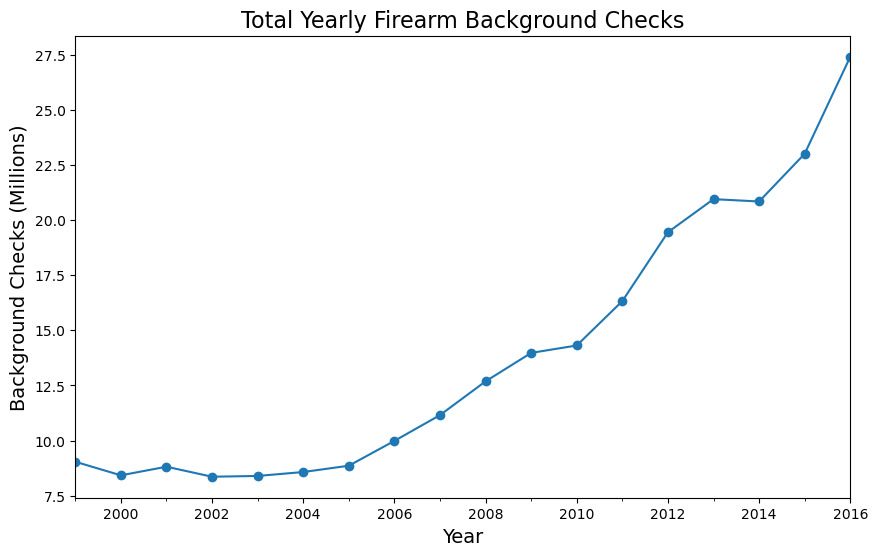

In [225]:
# Plot the data
total_backgroundchecks_yearly.plot(kind='line', figsize=(10, 6), marker='o')

# Format the Y-axis to show values in millions
y_ticks = np.arange(7500000, 30000000, 2500000)  # Y-axis tick range and steps
plt.yticks(y_ticks, [f'{ytick/1000000:.1f}' for ytick in y_ticks])  # Format Y ticks as millions

# Add labels and title
plt.title('Total Yearly Firearm Background Checks')
plt.xlabel('Year')
plt.ylabel('Background Checks (Millions)')

# Add labels and title with matching font size for X and Y labels
plt.title('Total Yearly Firearm Background Checks', fontsize=16)
plt.xlabel('Year', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks (Millions)', fontsize=14)  # Set font size for Y-axis label

# Display the plot
plt.show()


The line chart shows an increase of around 18 to 19 million total background checks between 1999 to 2016. The slope of the line increases as time goes on, indicating that there are more background checks with each passing year.

Next, I will look at the background check trends by month, so I will not need to exclude months from partial years.

In [226]:
total_checks_monthly = df_gun.groupby('month')['totals'].sum()

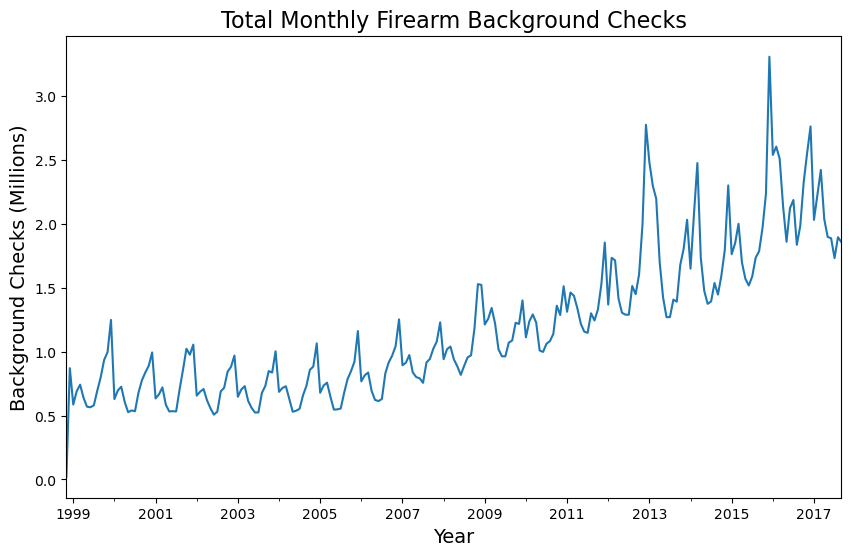

In [227]:
# Plot the data
total_checks_monthly.plot(kind='line', figsize=(10, 6))

# Add labels and title
plt.title('Total Monthly Firearm Background Checks')
plt.xlabel('Year')
plt.ylabel('Background Checks (Millions)')

# Format the Y-axis to show values in millions
y_ticks = np.arange(0, 3500000, 500000)  # Y-axis tick range and steps
plt.yticks(y_ticks, [f'{ytick/1000000:.1f}' for ytick in y_ticks])  # Format Y ticks as millions

# Add labels and title with matching font size for X and Y labels
plt.title('Total Monthly Firearm Background Checks', fontsize=16)
plt.xlabel('Year', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks (Millions)', fontsize=14)  # Set font size for Y-axis label

# Display the plot
plt.show()


The total monthly background checks still show an increase in background checks over time from 1998 to 2017. The increase is not consistent each month, with background checks increasing at the end of the year near the December month. 

This trend of increasing background checks could be attributed to the increase in the US population, since it is reasonable background checks for guns would increase along with an increase in population. The chart is also comparing total background checks, whereas the rate of background checks would take into account population size. Rates are better at comparing changes in data across different populations. If background checks were measured per person it would be a better representation of the rate of change in background checks over time. 

Another possible reason for the increase could be that the FBI added more data to background checks starting in 2001. The FBI added prepawn sales and redemption sales in 2001, and added private sales and return to seller transations in 2013. The additional data being collected over time could also contribute to higher totals in background checks each year. 

Next, I will look at the overall trend of guns sales, looking only at the columns for handguns, long guns, and multiple sales. In order to convert background checks into gun sales, I will use the methodology the New York Times uses for their statistical analysis (Eddelbuettel, Aisch & Keller, 2017). Each handgun and long gun background check is converted to 1.1 sales, while a multiple-gun background check is converted to two sales.

In [228]:
# Add columns for gun sales data to data frames 
# Converting background checks to sales using the New York Times methodology Jeremy Singer-Vine from BuzzFeed News referenced
# Each gun types is multiplied by 1.1 
# and multiple represents 2 or more gun purchases therefore we multiply it by 2.
df_gun['handgun_sales'] = df_gun['handgun'] * 1.1
df_gun['long_gun_sales'] = df_gun['long_gun'] * 1.1
df_gun['multiple_sales'] = df_gun['multiple'] * 2
df_gun['total_sales'] = df_gun['handgun_sales'] + df_gun['long_gun_sales'] + df_gun['multiple_sales']
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,handgun_sales,long_gun_sales,multiple_sales,total_sales
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019.0,2017-01-01,6307.4,6952.0,634.0,13893.4
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303.0,2017-01-01,2552.0,3223.0,320.0,6095.0
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394.0,2017-01-01,12169.3,8740.6,1262.0,22171.9
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747.0,2017-01-01,4781.7,6669.3,732.0,12183.0
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0,2017-01-01,40881.5,27039.1,0.0,67920.6


Now we can calculate annual and monthy sales of guns overtime as we did for background checks.

In [229]:
df_gun_full_years = df_gun.query('year >= "1999-01-01" & year <= "2016-12-31"')

total_sales_yearly = df_gun_full_years.groupby('year')['total_sales'].sum()
print(total_sales_yearly)

year
1999-01-01     8731052.1
2000-01-01     7854339.3
2001-01-01     8007430.8
2002-01-01     7056499.5
2003-01-01     7046706.5
2004-01-01     7341803.0
2005-01-01     7717739.7
2006-01-01     8203687.1
2007-01-01     8565531.9
2008-01-01     9428733.8
2009-01-01     9996250.5
2010-01-01     9723184.6
2011-01-01    11147264.3
2012-01-01    14245415.4
2013-01-01    15329662.7
2014-01-01    13347364.8
2015-01-01    14558804.8
2016-01-01    15976163.3
Name: total_sales, dtype: float64


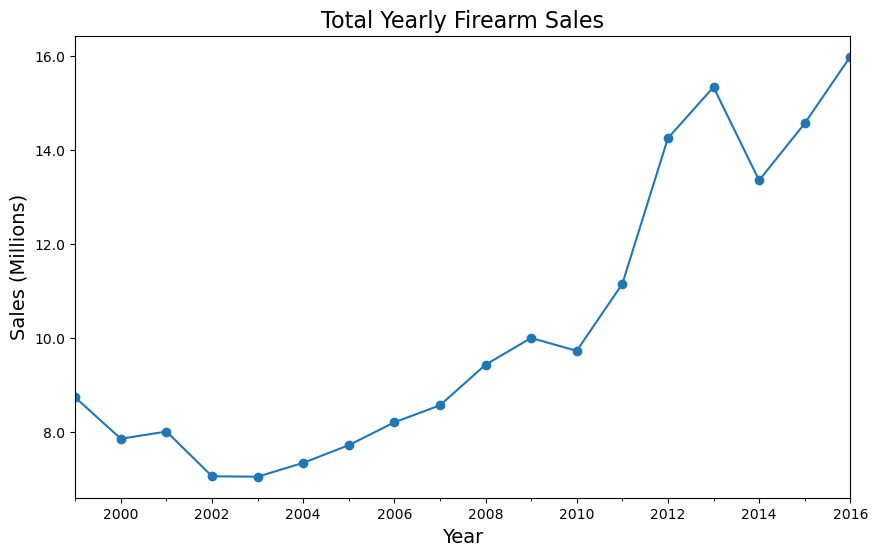

In [230]:
# Plot the data
total_sales_yearly.plot(kind='line', figsize=(10, 6), marker='o')

# Format the Y-axis to show values in millions
y_ticks = np.arange(8000000, 18000000, 2000000)  # Y-axis tick range and steps
plt.yticks(y_ticks, [f'{ytick/1000000:.1f}' for ytick in y_ticks])  # Format Y ticks as millions

# Add labels and title
plt.title('Total Yearly Firearm Sales')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')

# Add labels and title with matching font size for X and Y labels
plt.title('Total Yearly Firearm Sales', fontsize=16)
plt.xlabel('Year', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Sales (Millions)', fontsize=14)  # Set font size for Y-axis label

# Display the plot
plt.show()

The line chart shows an increase in total background checks between 1999 to 2016, much like the background checks. The sales have almost doubled from slightly less than 9 million in 1999 to about 16 million in 2017.

In [266]:
total_sales_monthly = df_gun.groupby('month')['total_sales'].sum()

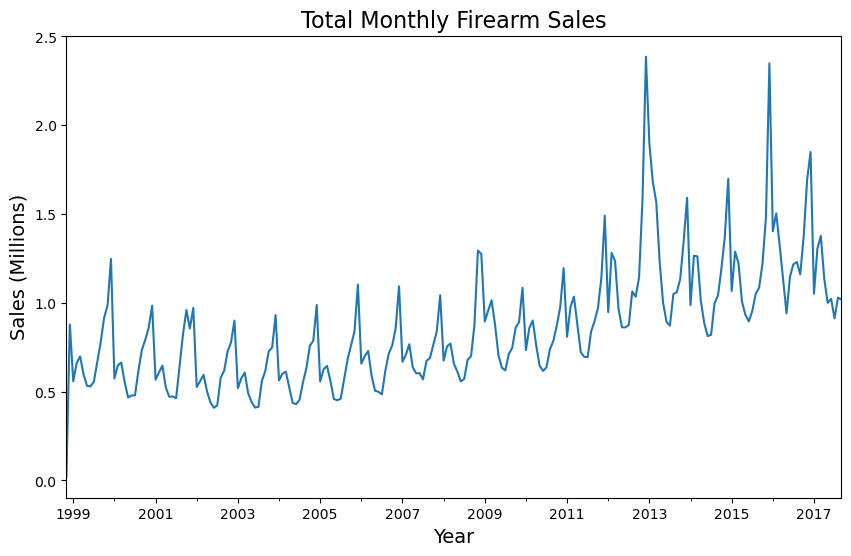

In [232]:
# Plot the data
total_sales_monthly.plot(kind='line', figsize=(10, 6))

# Add labels and title
plt.title('Total Monthly Firearm Sales')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')

# Format the Y-axis to show values in millions
y_ticks = np.arange(0, 3000000, 500000)  # Y-axis tick range and steps
plt.yticks(y_ticks, [f'{ytick/1e6:.1f}' for ytick in y_ticks])  # Format Y ticks as millions

# Add labels and title with matching font size for X and Y labels
plt.title('Total Monthly Firearm Sales', fontsize=16)
plt.xlabel('Year', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Sales (Millions)', fontsize=14)  # Set font size for Y-axis label

# Display the plot
plt.show()


The total monthly background checks still show an increase in gun sales over time from 1998 to 2017. Much like background checks, the increase is not consistent each month, with background checks increasing at the end of the year near the December month. 

While the charts for gun sales give a better representation of total guns sales over the past 20 years, all the charts for total gun background checks and sales have the same issue of not taking population size into account. A per captita estimate based on each state's population would be a better measure of whether background checks and sales are increasing. I will focus on this next.

To calculate per capita gun sales and background checks, I need create a dataset that contains population, total background checks, and total gun sales grouped by state and year. To do that, I'll first need to create two datasets: one for total background checks and sales from the gun data, and another for population from the census data. Since the census data for population is only for years 2010 and 2016, I will filter total background checks on only those two years.

In [233]:
# Filter df_gun dataframe to only include years 2010 and 2016
gun_2010_2016 = df_gun.query('year == "2010-01-01" or year == "2016-01-01"')

# Also include total_sales to use for later plots
total_gun_sales = gun_2010_2016.groupby(['state', 'year'], as_index=False)[['totals', 'total_sales']].sum()
total_gun_sales['year'] = total_gun_sales['year'].dt.year
total_gun_sales.head()

C:\Users\ncati\AppData\Local\Temp\ipykernel_1588\2593018796.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  gun_2010_2016 = df_gun.query('year == "2010-01-01" or year == "2016-01-01"')


,state,year,totals,total_sales
0,Alabama,2010,308607.0,289760.2
1,Alabama,2016,616947.0,315684.6
2,Alaska,2010,65909.0,67824.7
3,Alaska,2016,87647.0,86447.8
4,Arizona,2010,206050.0,181587.9


In [234]:
population = df_census[['state', 'Population_estimate_2016', 'Population_estimate_2010']]

# Unpivot the data to put year in a separate column from population
population = pd.melt(population, id_vars='state', var_name='year', value_name='population')
population['year'] = population['year'].str[-4:].astype(int)
population.head()

,state,year,population
0,Alabama,2016,4863300.0
1,Alaska,2016,741894.0
2,Arizona,2016,6931071.0
3,Arkansas,2016,2988248.0
4,California,2016,39250017.0


Now that I've created my datasets for population and total gun sales, I can combine them into one dataset to calculate background checks per capita.

In [235]:
# Merge the datasets for population with the background checks and gun sales
per_capita = total_gun_sales.merge(population, how='inner', on=['state', 'year'])

# Calculate separate per capita columns for background checks and gun sales 
per_capita['checks_per_capita'] = per_capita['totals']/per_capita['population']
per_capita['sales_per_capita'] = per_capita['total_sales']/per_capita['population']
per_capita.head()

,state,year,totals,total_sales,population,checks_per_capita,sales_per_capita
0,Alabama,2010,308607.0,289760.2,4780131.0,0.064560,0.060618
1,Alabama,2016,616947.0,315684.6,4863300.0,0.126858,0.064912
2,Alaska,2010,65909.0,67824.7,710249.0,0.092797,0.095494
3,Alaska,2016,87647.0,86447.8,741894.0,0.118140,0.116523
4,Arizona,2010,206050.0,181587.9,6392301.0,0.032234,0.028407


Now I will create histogram plots that shows the per capita rates of background checks and gun sales for the years 2010 and 2016, counted by state.

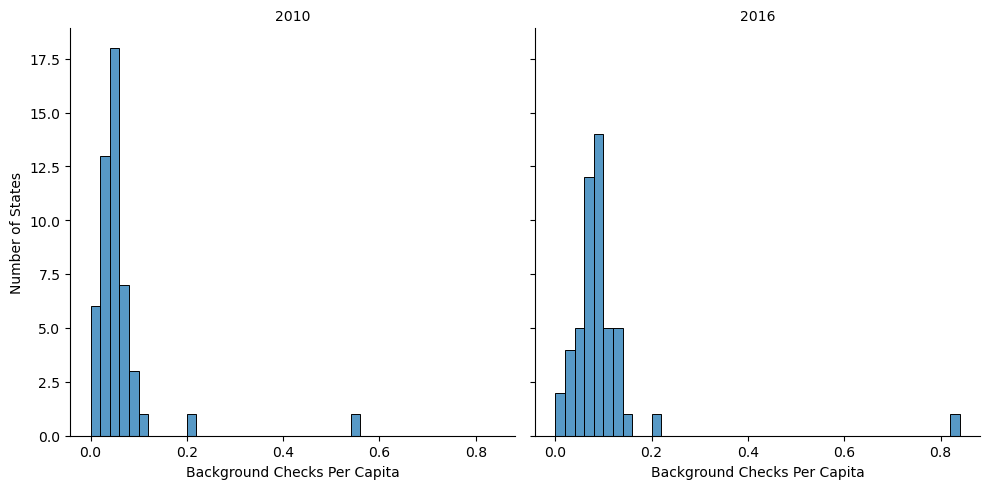

In [236]:
bin_size = 0.02
bins = np.arange(0, per_capita['checks_per_capita'].max()+bin_size, bin_size)
g = sb.displot(data=per_capita, x='checks_per_capita', col='year', bins=bins)
g.set_titles('{col_name}')
g.set_axis_labels('Background Checks Per Capita', 'Number of States');

The 2016 histogram for background checks is less right-skewed than the 2010 histogram, indicating that per capita background check rates have increased between 2010 and 2016. There are obvious outliers in both graphs with much higher background checks per capita than the remaining states.

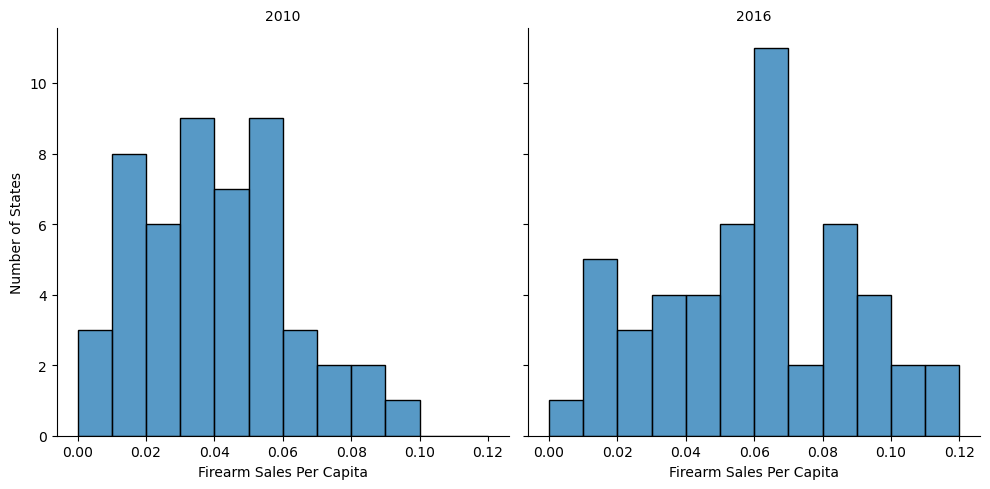

In [237]:
bin_size = 0.01
bins = np.arange(0, per_capita['sales_per_capita'].max()+bin_size, bin_size)
g = sb.displot(data=per_capita, x='sales_per_capita', col='year', bins=bins)
g.set_titles('{col_name}')
g.set_axis_labels('Firearm Sales Per Capita', 'Number of States');

Like the results for background checks, the 2016 histogram for gun sales is less right-skewed than the 2010 histogram, indicating that per capita gun sale rates have increased between 2010 and 2016. The outliers from the background checks visualization have disappeared here, meaning that those previous outliers must not have had a high percentage of background checks tied to the sale of guns.

### Which states have had the highest growth in gun registrations? 

To answer this question, I need to rank the states by their per capita rates for background checks. To do this, I will take the per_capita dataframe from the earlier question and pivot it so that per capita rates for 2010 and 2016 are in two different columns.

In [238]:
# Pivot the per capita table 
checks_per_capita_pivot = per_capita.groupby(['state', 'year'])['checks_per_capita'].max().unstack()
checks_per_capita_pivot = checks_per_capita_pivot.reset_index().rename_axis(None, axis=1)
checks_per_capita_pivot.rename(columns={2010: 'checks_per_capita_2010', 2016: 'checks_per_capita_2016'}, inplace=True)
checks_per_capita_pivot.head()

,state,checks_per_capita_2010,checks_per_capita_2016
0,Alabama,0.064560,0.126858
1,Alaska,0.092797,0.118140
2,Arizona,0.032234,0.060060
3,Arkansas,0.065654,0.089020
4,California,0.021914,0.060565


Now that the per capita rates have been split into separate columns, I can sort the new columns to get the top 15 states.

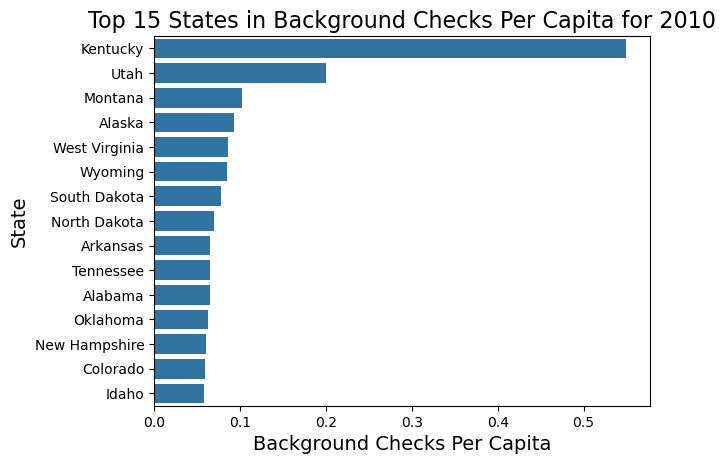

In [239]:
checks_per_capita_2010 = checks_per_capita_pivot.sort_values('checks_per_capita_2010', ascending=False).head(15)
base_color = sb.color_palette()[0]
sb.barplot(data=checks_per_capita_2010, x='checks_per_capita_2010', y='state', color=base_color)

# Add labels and title
plt.title('Yearly Background Checks')
plt.xlabel('Year')
plt.ylabel('Background Checks (Millions)')

# Add labels and title with matching font size for X and Y labels
plt.title('Top 15 States in Background Checks Per Capita for 2010', fontsize=16)
plt.xlabel('Background Checks Per Capita', fontsize=14)  # Set font size for X-axis label
plt.ylabel('State', fontsize=14);  # Set font size for Y-axis label

In 2010, the state with the highest per capita background check rate was Kentucky, which was more than 0.3 checks per capita ahead of the second highest state, Utah. The remaining states in the top 15 were all about the same rate, roughly between 0.05 and 0.1 checks per capita. This indicates that Kentucky was the outlier in the 2010 histogram for per capita background checks.

The next visualization will compare the top 15 states for 2016.

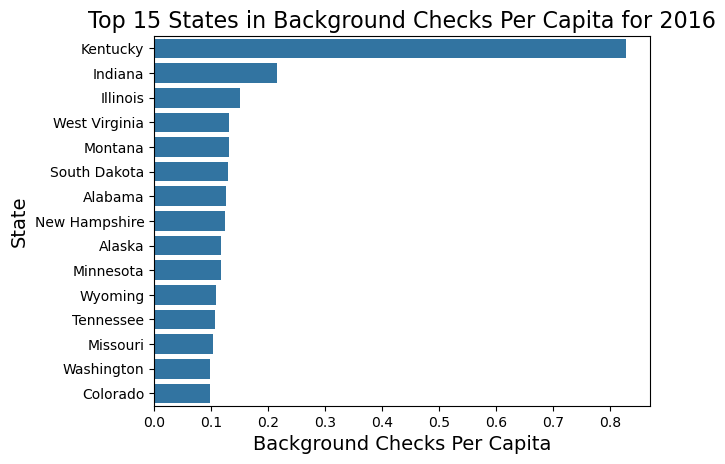

In [240]:
checks_per_capita_2016 = checks_per_capita_pivot.sort_values('checks_per_capita_2016', ascending=False).head(15)
base_color = sb.color_palette()[0]
sb.barplot(data=checks_per_capita_2016, x='checks_per_capita_2016', y='state', color=base_color)

# Add labels and title
plt.title('Yearly Background Checks')
plt.xlabel('Year')
plt.ylabel('Background Checks (Millions)')

# Add labels and title with matching font size for X and Y labels
plt.title('Top 15 States in Background Checks Per Capita for 2016', fontsize=16)
plt.xlabel('Background Checks Per Capita', fontsize=14)  # Set font size for X-axis label
plt.ylabel('State', fontsize=14);  # Set font size for Y-axis label

In 2016, the state with the highest per capita background check rate was once again Kentucky, which was more than 0.6 checks per capita ahead of the second highest state, Indiana. The remaining states in the top 15 were all about the same rate, roughly between 0.1 and 0.15 checks per capita. This indicates that Kentucky was also the outlier in the 2016 histogram for per capita background checks.

Lastly, in order to calculate the top 15 states growing in background checks, I will need to subtract the 2010 per capita rates from the 2016 per capita rates to show which states experienced the highest growth in background checks.

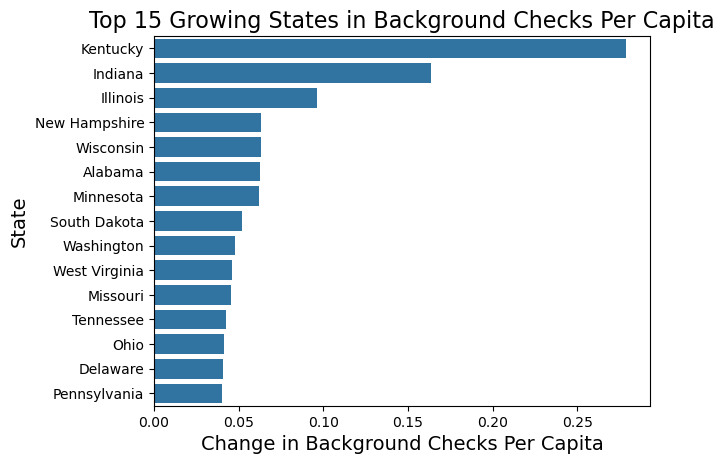

In [241]:
checks_per_capita_pivot['checks_per_capita_growth'] = checks_per_capita_pivot['checks_per_capita_2016']-checks_per_capita_pivot['checks_per_capita_2010']
checks_per_capita_growth = checks_per_capita_pivot.sort_values('checks_per_capita_growth', ascending=False).head(15)
sb.barplot(data=checks_per_capita_growth, x='checks_per_capita_growth', y='state', color=base_color)

# Add labels and title
plt.title('Top 15 Growing States in Background Checks Per Capita')
plt.xlabel('Change in Background Checks Per Capita')
plt.ylabel('State')

# Add labels and title with matching font size for X and Y labels
plt.title('Top 15 Growing States in Background Checks Per Capita', fontsize=16)
plt.xlabel('Change in Background Checks Per Capita', fontsize=14)  # Set font size for X-axis label
plt.ylabel('State', fontsize=14);  # Set font size for Y-axis label

Once again, the state with the most growth in per capita background checks is Kentucky, which grew by over 0.25 background checks per capita between 2010 and 2016. Indiana and Illinois are also both noticeably higher that the remaining top 15 states.

### What census data is most associated with high gun per capita? 

I will determine if there is a correlative relationship between the number of gun background checks and the demographic variables I selected from the census data from earlier, such as race, veteran status, immigrant status, education level, income level, and others. To do this, I will need to merge the census dataframe with the per capita dataframe to add all the relevant variables to one dataset.

In [242]:
# merge df_census with per_capita_pivot to create a new dataset called df_scattershot
df_scatterplot = df_census.copy()
df_scatterplot = df_scatterplot.merge(checks_per_capita_pivot, how='inner', on='state')
df_scatterplot.head()

,state,Population_estimate_2016,Population_estimate_2010,Percent_population_change_2010-2016,Percent_population_under_18_years_old_2016,Percent_population_under_18_years_old_2010,Percent_black_2016,Percent_indigenous_2016,Percent_asian_2016,Percent_hispanic_2016,Percent_white_2016,Veteran_2011-2015,Percent_immigrant_2011-2015,Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_disability_under_65_years_old_2011-2015,Median_household_income_2011-2015_dollars,Per_capita_income_last_12_months_2011-2015_dollars,Total_employment_2015,Population_density_2010,checks_per_capita_2010,checks_per_capita_2016,checks_per_capita_growth
0,Alabama,4863300.0,4780131.0,0.017,0.226,0.237,0.268,0.007,0.014,0.042,0.658,363170.0,0.035,0.843,0.235,0.118,43623.0,24091.0,1634391.0,94.4,0.064560,0.126858,0.062297
1,Alaska,741894.0,710249.0,0.045,0.252,0.264,0.038,0.152,0.063,0.070,0.612,69323.0,0.074,0.921,0.280,0.081,72515.0,33413.0,267999.0,1.2,0.092797,0.118140,0.025342
2,Arizona,6931071.0,6392301.0,0.084,0.235,0.255,0.049,0.054,0.034,0.309,0.555,505794.0,0.135,0.860,0.275,0.082,50255.0,25848.0,2295186.0,56.3,0.032234,0.060060,0.027826
3,Arkansas,2988248.0,2916025.0,0.025,0.236,0.244,0.157,0.010,0.016,0.073,0.729,220953.0,0.047,0.848,0.211,0.123,41371.0,22798.0,1003113.0,56.0,0.065654,0.089020,0.023366
4,California,39250017.0,37254522.0,0.054,0.232,0.250,0.065,0.017,0.148,0.389,0.377,1777410.0,0.270,0.818,0.314,0.068,61818.0,30318.0,14325377.0,239.1,0.021914,0.060565,0.038651


In [243]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   state                                                                   50 non-null     object 
 1   Population_estimate_2016                                                50 non-null     float64
 2   Population_estimate_2010                                                50 non-null     float64
 3   Percent_population_change_2010-2016                                     50 non-null     float64
 4   Percent_population_under_18_years_old_2016                              50 non-null     float64
 5   Percent_population_under_18_years_old_2010                              50 non-null     float64
 6   Percent_black_2016                                                      50 non-null 

Half of our variables have data either for 2010 or 2016 which allows us to use our previous 2010 and 2016 populations to calculate percapita rates. The other half of the variables have data that covers 2011 to 2015, 2010 to 2016, or just 2015. For these variables, since we only have population data for 2010 and 2016, we will need to take the total number of background checks for each of these time periods and divide by the 2010 population to get per capita estimates.

In [244]:
# Filter df_gun dataframe to only include years 2011 to 2015
gun_2011_2015 = df_gun.query('year >= "2011-01-01" and year <= "2015-01-01"')

# Sum the totals column by state
gun_2011_2015 = gun_2011_2015.groupby('state')['totals'].sum().reset_index()
gun_2011_2015.rename(columns={'totals': 'checks_2011_2015'}, inplace=True)
gun_2011_2015.head()

,state,checks_2011_2015
0,Alabama,2690152.0
1,Alaska,422189.0
2,Arizona,1596290.0
3,Arkansas,1223785.0
4,California,6642294.0


In [245]:
# Filter df_gun dataframe to only include year 2015
gun_2015 = df_gun.query('year == "2015-01-01"')

# Sum the totals column by state
gun_2015 = gun_2015.groupby('state')['totals'].sum().reset_index()
gun_2015.rename(columns={'totals': 'checks_2015'}, inplace=True)
gun_2015.head()            

C:\Users\ncati\AppData\Local\Temp\ipykernel_1588\1409302847.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  gun_2015 = df_gun.query('year == "2015-01-01"')


,state,checks_2015
0,Alabama,737509.0
1,Alaska,85621.0
2,Arizona,331442.0
3,Arkansas,257346.0
4,California,1761079.0


In [246]:
# Filter df_gun dataframe to only include year 2015
gun_2010_2016 = df_gun.query('year >= "2010-01-01" and year <= "2016-01-01"')

# Sum the totals column by state
gun_2010_2016 = gun_2010_2016.groupby('state')['totals'].sum().reset_index()
gun_2010_2016.rename(columns={'totals': 'checks_2010_2016'}, inplace=True)
gun_2010_2016.head()

,state,checks_2010_2016
0,Alabama,3615706.0
1,Alaska,575745.0
2,Arizona,2218619.0
3,Arkansas,1681247.0
4,California,9835860.0


In [247]:
# Merge df_scatterplot with the gun datasets for each time period
df_scatterplot = df_scatterplot.merge(gun_2011_2015, how='inner', on='state')
df_scatterplot = df_scatterplot.merge(gun_2015, how='inner', on='state')
df_scatterplot = df_scatterplot.merge(gun_2010_2016, how='inner', on='state')
df_scatterplot.head()

,state,Population_estimate_2016,Population_estimate_2010,Percent_population_change_2010-2016,Percent_population_under_18_years_old_2016,Percent_population_under_18_years_old_2010,Percent_black_2016,Percent_indigenous_2016,Percent_asian_2016,Percent_hispanic_2016,Percent_white_2016,Veteran_2011-2015,Percent_immigrant_2011-2015,Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_disability_under_65_years_old_2011-2015,Median_household_income_2011-2015_dollars,Per_capita_income_last_12_months_2011-2015_dollars,Total_employment_2015,Population_density_2010,checks_per_capita_2010,checks_per_capita_2016,checks_per_capita_growth,checks_2011_2015,checks_2015,checks_2010_2016
0,Alabama,4863300.0,4780131.0,0.017,0.226,0.237,0.268,0.007,0.014,0.042,0.658,363170.0,0.035,0.843,0.235,0.118,43623.0,24091.0,1634391.0,94.4,0.064560,0.126858,0.062297,2690152.0,737509.0,3615706.0
1,Alaska,741894.0,710249.0,0.045,0.252,0.264,0.038,0.152,0.063,0.070,0.612,69323.0,0.074,0.921,0.280,0.081,72515.0,33413.0,267999.0,1.2,0.092797,0.118140,0.025342,422189.0,85621.0,575745.0
2,Arizona,6931071.0,6392301.0,0.084,0.235,0.255,0.049,0.054,0.034,0.309,0.555,505794.0,0.135,0.860,0.275,0.082,50255.0,25848.0,2295186.0,56.3,0.032234,0.060060,0.027826,1596290.0,331442.0,2218619.0
3,Arkansas,2988248.0,2916025.0,0.025,0.236,0.244,0.157,0.010,0.016,0.073,0.729,220953.0,0.047,0.848,0.211,0.123,41371.0,22798.0,1003113.0,56.0,0.065654,0.089020,0.023366,1223785.0,257346.0,1681247.0
4,California,39250017.0,37254522.0,0.054,0.232,0.250,0.065,0.017,0.148,0.389,0.377,1777410.0,0.270,0.818,0.314,0.068,61818.0,30318.0,14325377.0,239.1,0.021914,0.060565,0.038651,6642294.0,1761079.0,9835860.0


Now I can calculate the per capita values for the new time periods. I noticed that the veterans and employment are measured in total numbers rather than percentages, so I will need to convert them to percentages by dividing them by the 2010 population so that every state is comparable.

In [248]:
# Calculate per capita values for each new time period
df_scatterplot['checks_per_capita_2011_2015'] = df_scatterplot['checks_2011_2015']/df_scatterplot['Population_estimate_2010']
df_scatterplot['checks_per_capita_2015'] = df_scatterplot['checks_2015']/df_scatterplot['Population_estimate_2010']
df_scatterplot['checks_per_capita_2010_2016'] = df_scatterplot['checks_2010_2016']/df_scatterplot['Population_estimate_2010']
# veterans column shows totals so find percentages
df_scatterplot['Veteran_2011-2015'] = df_scatterplot['Veteran_2011-2015']/df_scatterplot['Population_estimate_2010']
# employment column shows totals so find percentages
df_scatterplot['Total_employment_2015'] = df_scatterplot['Total_employment_2015']/df_scatterplot['Population_estimate_2010']

df_scatterplot.drop(['Population_estimate_2016', 'Population_estimate_2010', 'checks_2011_2015', 'checks_2015', 'checks_2010_2016'], axis=1, inplace=True)
df_scatterplot.head()

,state,Percent_population_change_2010-2016,Percent_population_under_18_years_old_2016,Percent_population_under_18_years_old_2010,Percent_black_2016,Percent_indigenous_2016,Percent_asian_2016,Percent_hispanic_2016,Percent_white_2016,Veteran_2011-2015,Percent_immigrant_2011-2015,Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015,Percent_disability_under_65_years_old_2011-2015,Median_household_income_2011-2015_dollars,Per_capita_income_last_12_months_2011-2015_dollars,Total_employment_2015,Population_density_2010,checks_per_capita_2010,checks_per_capita_2016,checks_per_capita_growth,checks_per_capita_2011_2015,checks_per_capita_2015,checks_per_capita_2010_2016
0,Alabama,0.017,0.226,0.237,0.268,0.007,0.014,0.042,0.658,0.075975,0.035,0.843,0.235,0.118,43623.0,24091.0,0.341913,94.4,0.064560,0.126858,0.062297,0.562778,0.154286,0.756403
1,Alaska,0.045,0.252,0.264,0.038,0.152,0.063,0.070,0.612,0.097604,0.074,0.921,0.280,0.081,72515.0,33413.0,0.377331,1.2,0.092797,0.118140,0.025342,0.594424,0.120551,0.810624
2,Arizona,0.084,0.235,0.255,0.049,0.054,0.034,0.309,0.555,0.079125,0.135,0.860,0.275,0.082,50255.0,25848.0,0.359055,56.3,0.032234,0.060060,0.027826,0.249721,0.051850,0.347077
3,Arkansas,0.025,0.236,0.244,0.157,0.010,0.016,0.073,0.729,0.075772,0.047,0.848,0.211,0.123,41371.0,22798.0,0.344000,56.0,0.065654,0.089020,0.023366,0.419676,0.088252,0.576554
4,California,0.054,0.232,0.250,0.065,0.017,0.148,0.389,0.377,0.047710,0.270,0.818,0.314,0.068,61818.0,30318.0,0.384527,239.1,0.021914,0.060565,0.038651,0.178295,0.047272,0.264018


Now I can create the scatter plots for each of my chosen variables. In each scatter plot, I will compare each variable to background checks per capita by state. I will add a Pearson correlation coefficient and a trendline to indicate the strength of the correlation.

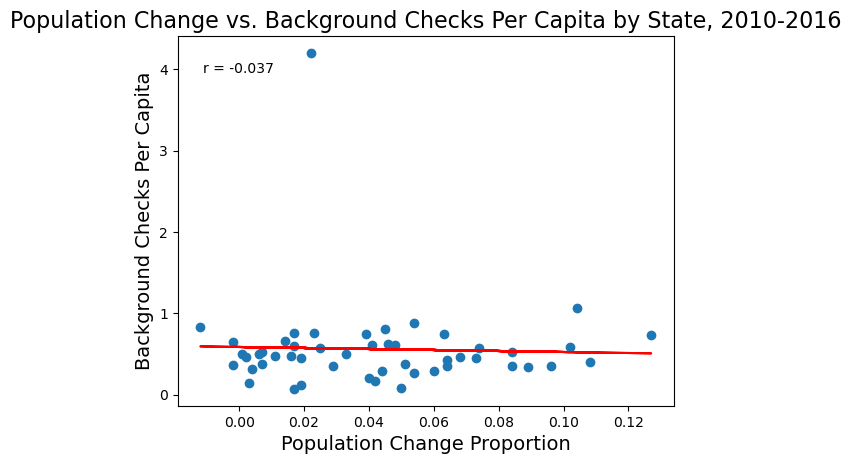

In [249]:
r, p = pearsonr(df_scatterplot['Percent_population_change_2010-2016'], df_scatterplot['checks_per_capita_2010_2016'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_population_change_2010-2016', y='checks_per_capita_2010_2016')

# Add the trendline
x_vals = df_scatterplot['Percent_population_change_2010-2016']
y_vals = df_scatterplot['checks_per_capita_2010_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Population Change vs. Background Checks Per Capita by State, 2010-2016')
plt.xlabel('Population Change Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Population Change vs. Background Checks Per Capita by State, 2010-2016', fontsize=16)
plt.xlabel('Population Change Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak negative correlation between background checks per capita and the change in population from 2010 to 2016. States with a higher population proportion do not tend to differ in background checks per capita.

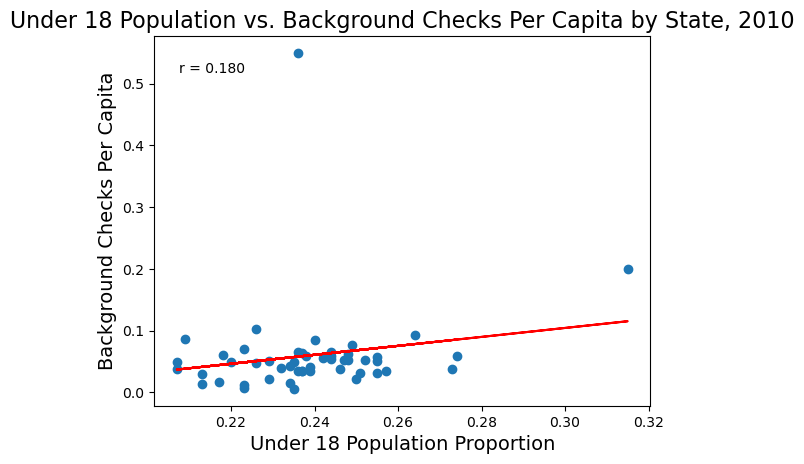

In [250]:
r, p = pearsonr(df_scatterplot['Percent_population_under_18_years_old_2010'], df_scatterplot['checks_per_capita_2010'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_population_under_18_years_old_2010', y='checks_per_capita_2010')

# Add the trendline
x_vals = df_scatterplot['Percent_population_under_18_years_old_2010']
y_vals = df_scatterplot['checks_per_capita_2010']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Under 18 Population vs. Background Checks Per Capita by State, 2010')
plt.xlabel('Under 18 Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Under 18 Population vs. Background Checks Per Capita by State, 2010', fontsize=16)
plt.xlabel('Under 18 Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak positive correlation between background checks per capita and the proportion of the population under 18 years old in 2010. States that have a higher proportion of people under 18 years during that year do not tend to differ in background checks per capita.

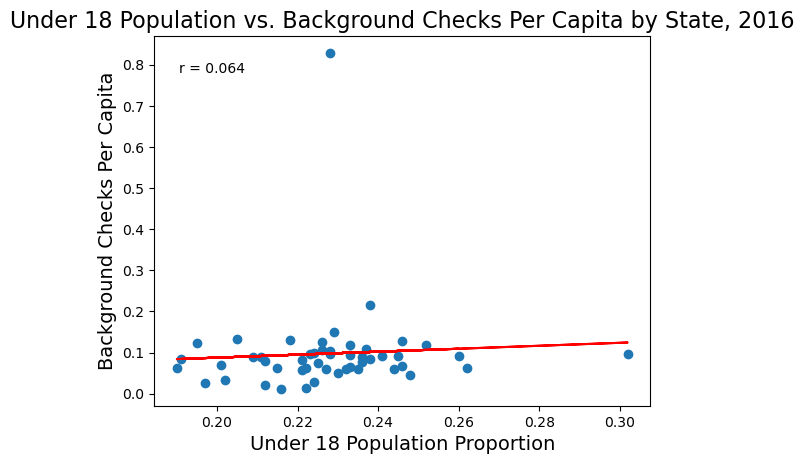

In [251]:
r, p = pearsonr(df_scatterplot['Percent_population_under_18_years_old_2016'], df_scatterplot['checks_per_capita_2016'])
fig, ax = plt.subplots()
# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)
# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_population_under_18_years_old_2016', y='checks_per_capita_2016')
    
# Add the trendline
x_vals = df_scatterplot['Percent_population_under_18_years_old_2016']
y_vals = df_scatterplot['checks_per_capita_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')    
    
# Add labels and title
plt.title('Under 18 Population vs. Background Checks Per Capita by State, 2016')
plt.xlabel('Under 18 Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Under 18 Population vs. Background Checks Per Capita by State, 2016', fontsize=16)
plt.xlabel('Under 18 Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak positive correlation between background checks per capita and the proportion of the population under 18 years old in 2016. States that have a higher proportion of people under 18 years old during that year do not tend to differ in background checks per capita.

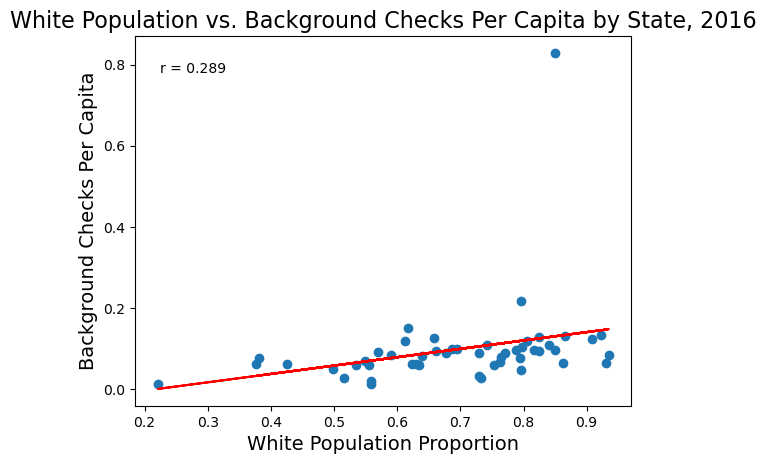

In [252]:
r, p = pearsonr(df_scatterplot['Percent_white_2016'], df_scatterplot['checks_per_capita_2016'])
fig, ax = plt.subplots()
# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)
# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_white_2016', y='checks_per_capita_2016')
    
# Add labels and title
plt.title('White Population vs. Background Checks Per Capita by State, 2016')
plt.xlabel('White Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add the trendline
x_vals = df_scatterplot['Percent_white_2016']
y_vals = df_scatterplot['checks_per_capita_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')    
    
# Add labels and title with matching font size for X and Y labels
plt.title('White Population vs. Background Checks Per Capita by State, 2016', fontsize=16)
plt.xlabel('White Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak positive correlation between background checks per capita and the proportion of white people in the population in 2016. States that have a higher proportion of white people slightly tend to have an increased number of background checks per capita.

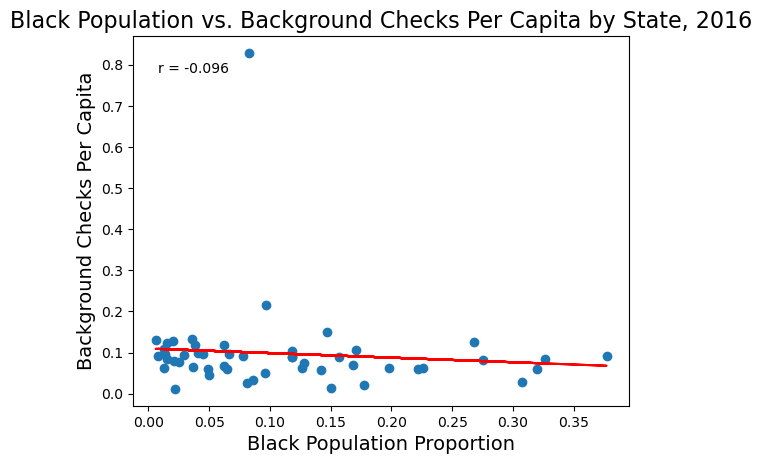

In [253]:
r, p = pearsonr(df_scatterplot['Percent_black_2016'], df_scatterplot['checks_per_capita_2016'])
fig, ax = plt.subplots()
# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)
# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_black_2016', y='checks_per_capita_2016')

# Add the trendline
x_vals = df_scatterplot['Percent_black_2016']
y_vals = df_scatterplot['checks_per_capita_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')  

# Add labels and title
plt.title('Black Population vs. Background Checks Per Capita by State, 2016')
plt.xlabel('Black Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Black Population vs. Background Checks Per Capita by State, 2016', fontsize=16)
plt.xlabel('Black Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak negative correlation between background checks per capita and the proportion of black people in the population in 2016. States that have a higher proportion of black people do not tend to differ in background checks per capita.

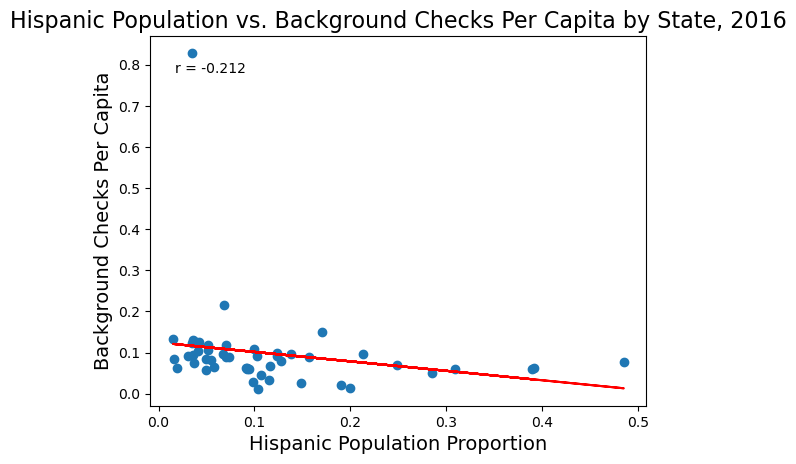

In [254]:
r, p = pearsonr(df_scatterplot['Percent_hispanic_2016'], df_scatterplot['checks_per_capita_2016'])
fig, ax = plt.subplots()
# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)
# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_hispanic_2016', y='checks_per_capita_2016')

# Add the trendline
x_vals = df_scatterplot['Percent_hispanic_2016']
y_vals = df_scatterplot['checks_per_capita_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')  

# Add labels and title
plt.title('Hispanic Population vs. Background Checks Per Capita by State, 2016')
plt.xlabel('Hispanic Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Hispanic Population vs. Background Checks Per Capita by State, 2016', fontsize=16)
plt.xlabel('Hispanic Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak negative correlation between background checks per capita and the proportion of hispanic people in the population in 2016. States that have a lower proportion of hispanic people tend to have a slightly increased number of background checks per capita.

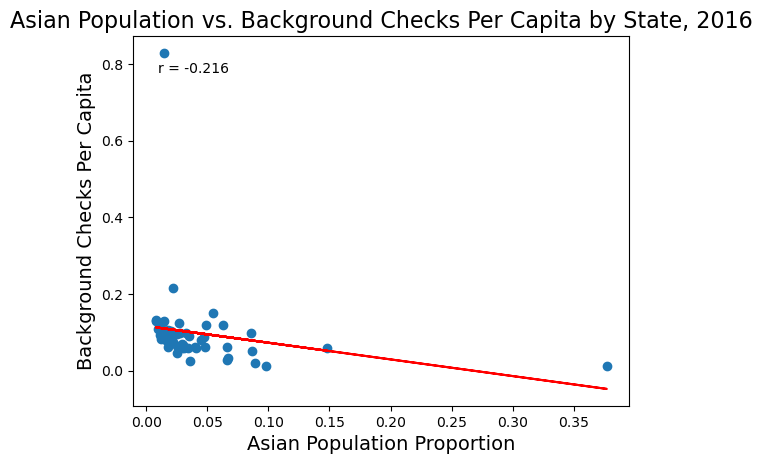

In [255]:
r, p = pearsonr(df_scatterplot['Percent_asian_2016'], df_scatterplot['checks_per_capita_2016'])
fig, ax = plt.subplots()
# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)
# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_asian_2016', y='checks_per_capita_2016')

# Add the trendline
x_vals = df_scatterplot['Percent_asian_2016']
y_vals = df_scatterplot['checks_per_capita_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')  


# Add labels and title
plt.title('Asian Population vs. Background Checks Per Capita by State, 2016')
plt.xlabel('Asian Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Asian Population vs. Background Checks Per Capita by State, 2016', fontsize=16)
plt.xlabel('Asian Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak negative correlation between background checks per capita and the proportion of asian people in the population in 2016. States that have a lower proportion of asian people tend to have a slightly increased number of background checks per capita.

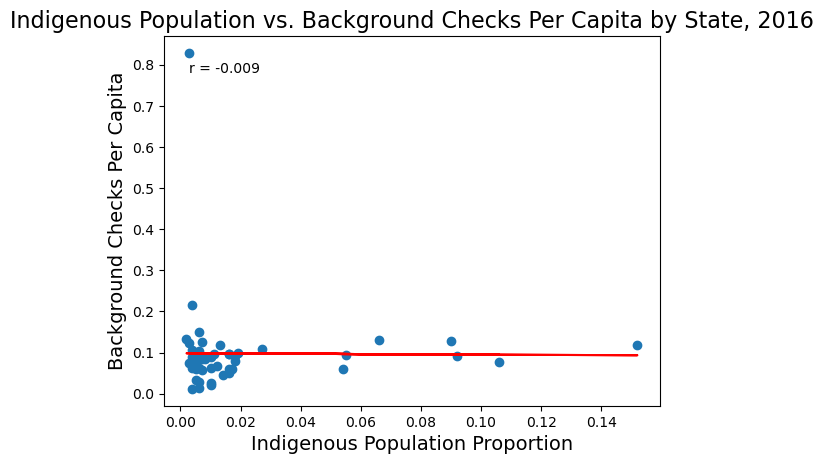

In [256]:
r, p = pearsonr(df_scatterplot['Percent_indigenous_2016'], df_scatterplot['checks_per_capita_2016'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_indigenous_2016', y='checks_per_capita_2016')

# Add the trendline
x_vals = df_scatterplot['Percent_indigenous_2016']
y_vals = df_scatterplot['checks_per_capita_2016']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Indigenous Population vs. Background Checks Per Capita by State, 2016')
plt.xlabel('Indigenous Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Indigenous Population vs. Background Checks Per Capita by State, 2016', fontsize=16)
plt.xlabel('Indigenous Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak negative correlation between background checks per capita and the proportion of indigenous people in the population in 2016. States that have a higher proportion of indigenous people do not tend to differ in background checks per capita.

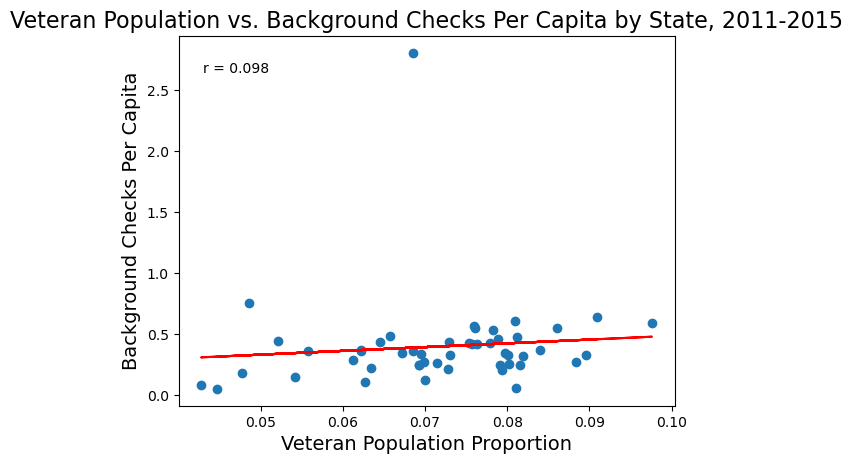

In [257]:
r, p = pearsonr(df_scatterplot['Veteran_2011-2015'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Veteran_2011-2015', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Veteran_2011-2015']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Veteran Population vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('Veteran Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Veteran Population vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('Veteran Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak positive correlation between background checks per capita and the proportion of veterans in the population between 2011 and 2015. States that have an increased proportion of veterans do not tend to differ in background checks per capita.

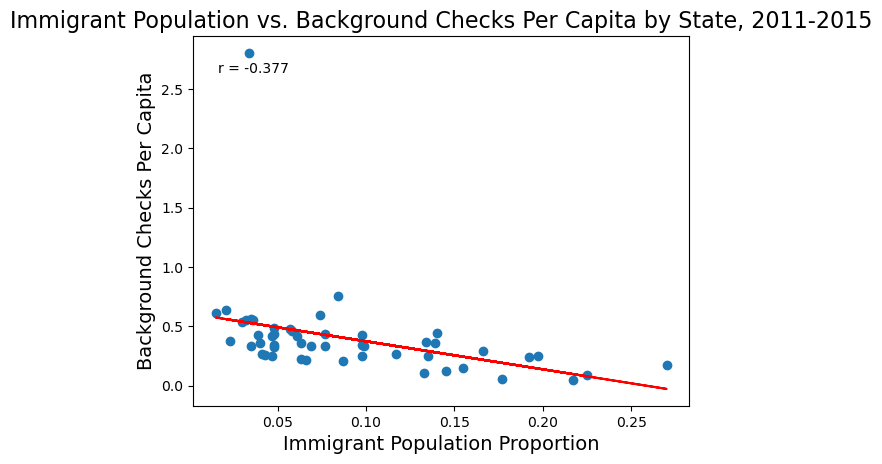

In [258]:
r, p = pearsonr(df_scatterplot['Percent_immigrant_2011-2015'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_immigrant_2011-2015', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Percent_immigrant_2011-2015']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Immigrant Population vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('Immigrant Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Immigrant Population vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('Immigrant Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak negative correlation between background checks per capita and the proportion of immigrants in the population between 2011 and 2015. States that have a lower proportion of immigrants tend to have an increased number of background checks per capita.

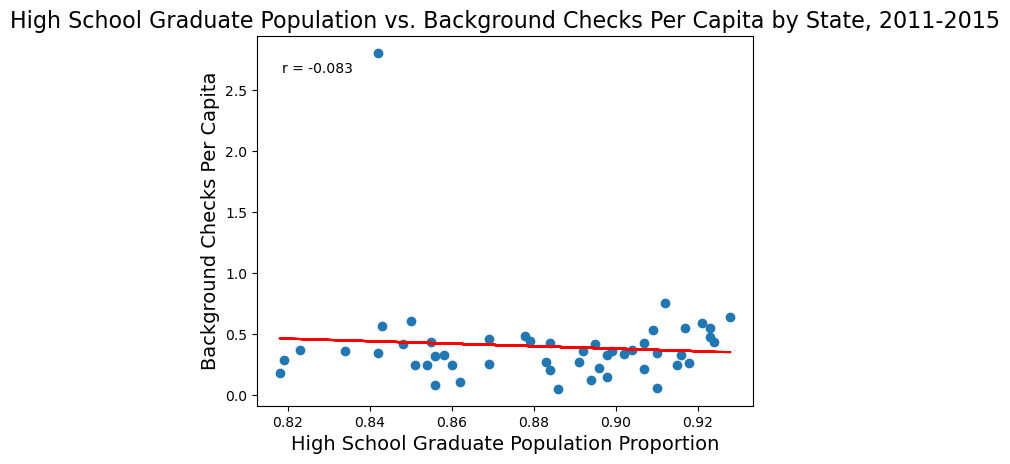

In [259]:
r, p = pearsonr(df_scatterplot['Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Percent_high_school_graduate_or_higher_25_years_old_or_older_2011-2015']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('High School Graduate Population vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('High School Graduate Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('High School Graduate Population vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('High School Graduate Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak negative correlation between background checks per capita and the proportion of high school graduates over the age of 25 in the population between 2011 and 2015. States that have a higher proportion of high school graduates do not tend to differ in background checks per capita.

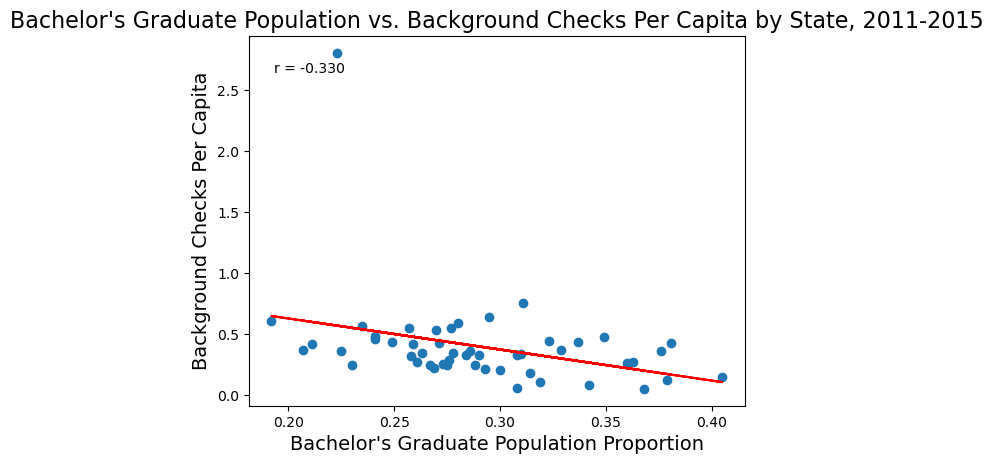

In [260]:
r, p = pearsonr(df_scatterplot['Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Percent_bachelors_graduate_or_higher_25_years_old_or_older_2011-2015']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Bachelor\'s Graduate Population vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('Bachelor\'s Graduate Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Bachelor\'s Graduate Population vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('Bachelor\'s Graduate Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak negative correlation between background checks per capita and the proportion of bachelor's graduates over the age of 25 in the population between 2011 and 2015. States that have a lower proportion of graduates with bachelor's degrees slightly tend to have an increased number of background checks per capita.

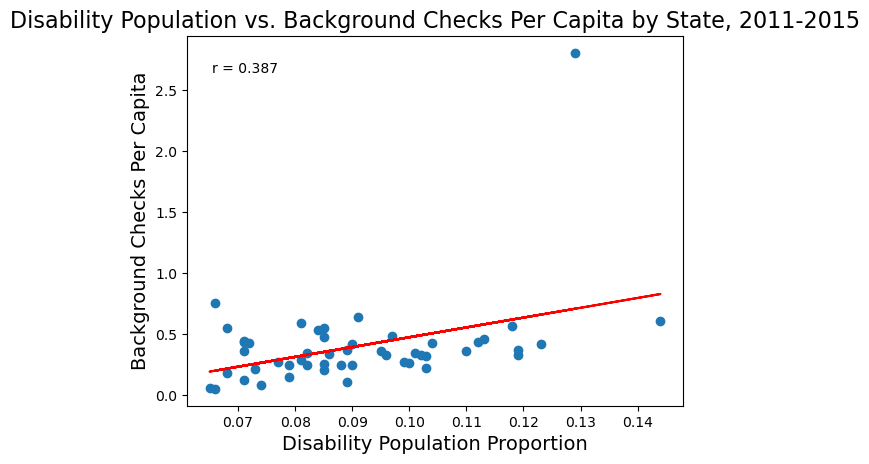

In [261]:
r, p = pearsonr(df_scatterplot['Percent_disability_under_65_years_old_2011-2015'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Percent_disability_under_65_years_old_2011-2015', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Percent_disability_under_65_years_old_2011-2015']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Disability Population vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('Disability Population Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Disability Population vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('Disability Population Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak positive correlation between background checks per capita and the proportion of people with disabilities in the population between 2011 and 2015. States that have a higher proportion of people with disabilities tend to have a slightly increased number of background checks per capita.

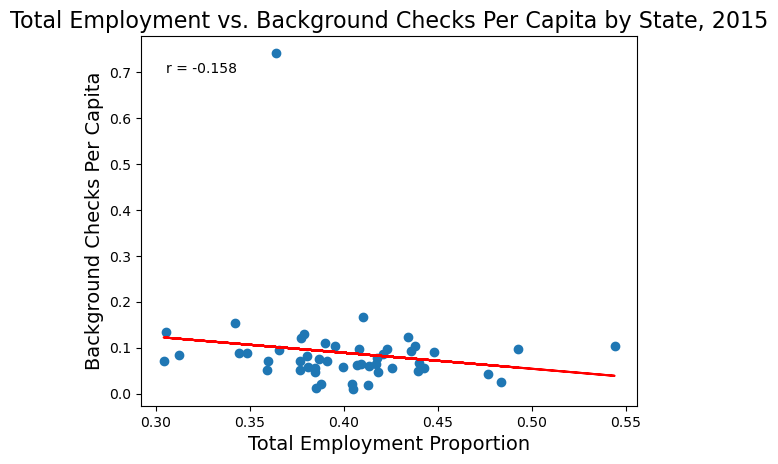

In [262]:
r, p = pearsonr(df_scatterplot['Total_employment_2015'], df_scatterplot['checks_per_capita_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Total_employment_2015', y='checks_per_capita_2015')

# Add the trendline
x_vals = df_scatterplot['Total_employment_2015']
y_vals = df_scatterplot['checks_per_capita_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Total Employment vs. Background Checks Per Capita by State, 2015')
plt.xlabel('Total Employment Proportion')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Total Employment vs. Background Checks Per Capita by State, 2015', fontsize=16)
plt.xlabel('Total Employment Proportion', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a very weak negative correlation between background checks per capita and the proportion of employed people in the population between 2011 and 2015. States that have a higher proportion of employed people do not tend to differ in background checks per capita.

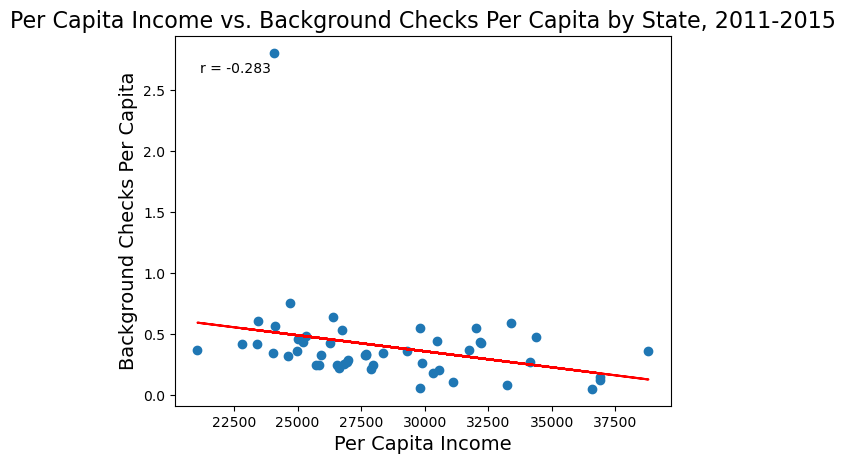

In [263]:
r, p = pearsonr(df_scatterplot['Per_capita_income_last_12_months_2011-2015_dollars'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Per_capita_income_last_12_months_2011-2015_dollars', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Per_capita_income_last_12_months_2011-2015_dollars']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Per Capita Income vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('Per Capita Income')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Per Capita Income vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('Per Capita Income', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak negative correlation between background checks per capita and per capita income between 2011 and 2015. States that have a lower per capita income tend to have a slightly increased number of background checks per capita.

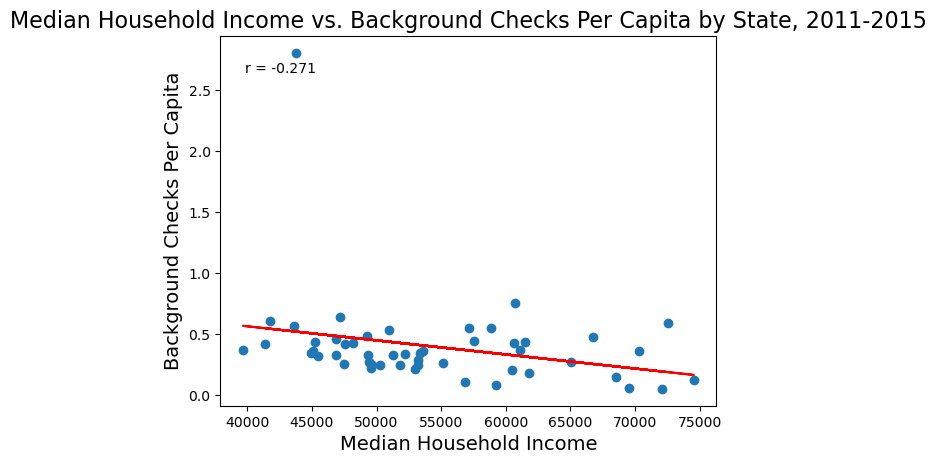

In [264]:
r, p = pearsonr(df_scatterplot['Median_household_income_2011-2015_dollars'], df_scatterplot['checks_per_capita_2011_2015'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Median_household_income_2011-2015_dollars', y='checks_per_capita_2011_2015')

# Add the trendline
x_vals = df_scatterplot['Median_household_income_2011-2015_dollars']
y_vals = df_scatterplot['checks_per_capita_2011_2015']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Median Household Income vs. Background Checks Per Capita by State, 2011-2015')
plt.xlabel('Median Household Income')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Median Household Income vs. Background Checks Per Capita by State, 2011-2015', fontsize=16)
plt.xlabel('Median Household Income', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

Like per capita income, there is a weak negative correlation between background checks per capita and median household income between 2011 and 2015. States that have a lower median income tend to have a slightly increased number of background checks per capita.

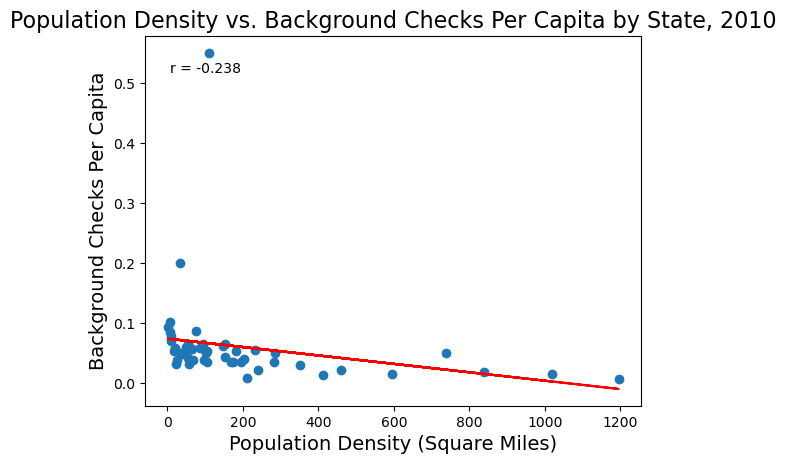

In [265]:
r, p = pearsonr(df_scatterplot['Population_density_2010'], df_scatterplot['checks_per_capita_2010'])
fig, ax = plt.subplots()

# place correlation coefficient label at specified position
ax.text(0.05, 0.90, 'r = {:0.3f}'.format(r), transform=ax.transAxes)

# plots the demographic on the x-axis against the per capita background checks on the y-axis for every state
plt.scatter(data=df_scatterplot, x='Population_density_2010', y='checks_per_capita_2010')

# Add the trendline
x_vals = df_scatterplot['Population_density_2010']
y_vals = df_scatterplot['checks_per_capita_2010']
# Calculate the coefficients of the trendline
slope, intercept = np.polyfit(x_vals, y_vals, 1)  # 1 means linear trendline
# Create the trendline points
trendline = slope * x_vals + intercept
plt.plot(x_vals, trendline, color='red', label='Trendline')
    
# Add labels and title
plt.title('Population Density vs. Background Checks Per Capita by State, 2010')
plt.xlabel('Population Density (Square Miles)')
plt.ylabel('Background Checks Per Capita')

# Add labels and title with matching font size for X and Y labels
plt.title('Population Density vs. Background Checks Per Capita by State, 2010', fontsize=16)
plt.xlabel('Population Density (Square Miles)', fontsize=14)  # Set font size for X-axis label
plt.ylabel('Background Checks Per Capita', fontsize=14);  # Set font size for Y-axis label

There is a weak negative correlation between background checks per capita and population density in 2010. States that have a lower population density tend to have a slightly increased number of background checks per capita.

# Conclusion

### Results

Because I have only looked at correlations, any interpretations based on these results cannot infer causation from any variables.

I attempted to answer the following three questions as part of my analysis:

1) What is the overall trend of background checks and gun purchases?
2) Which states have had the highest growth in gun registrations?
3) What census data is most associated with high gun per capita? 

The overall trend appears to be an increase in both background checks and firearm sales since 1998 when the NICS first began collecting this data. Annual background checks increased by about 18 to 19 million between 1999 and 2016, while annual gun sales increased by about 7 to 8 million during that same period. Looking at monthly figures, however, revealed that these were not gradual increases throughout the year. Rather, background checks and gun sales both experience a significant increase at the end of the year around November and December before declining as the new year begins, showing a repeated pattern of increasing and decreasing firearm transactions.

In order to ensure that this increase was not caused by a corresponding increase in population, I calculated per capita measures for background checks and gun sales and looked for any changes between 2010 and 2016. The distributions for 2016 were always more less right-skewed than the 2010 distributions, which indicated that per capita estimates had increased for both background checks and gun sales from 2010 to 2016.

When comparing the per capita rates for background checks by state in 2010, Kentucky had the highest per capita rate of over 0.5 checks per capita, more than 0.3 checks higher than the 2nd highest state that year, Utah. Kentucky also had the highest per capita rate for 2016 at over 0.8 checks per capita, more than 0.6 checks higher than the 2nd highest state that year, Indiana. When looking at the states with the fastest growing per capita rates, Kentucky was once again the top state with a growth rate of over 0.25 checks per capita, more than 0.1 checks higher than Indiana at a growth rate of 0.15 checks per capita.

Between 2010 and 2016, there were nine states that were in the top 15 background checks per capita for both 2010 and 2016: Kentucky, Montana, Alaska, West Virginia, Wyoming, Tennessee, Arizona, New Hampshire, and Colarado. Only four of those states were also in the top 15 for highest per capita growth: Kentucky, West Virginia, Tennessee, and New Hampshire.

When looking at demographics, the strengh of the correlation between each demographic variable and per capita background checks ranged from weak (0.2 < r < 0.4) to very weak (r < 0.2). Despite this, the scatterplots indicated some relationship between cetain demographics and per capita background checks. For the weak correlations, per capita background checks tended to be higher in populations with the following demographics:
* higher proportion of white individuals 
* lower proportion of hispanic and asian individuals 
* lower proportion of immigrants
* higher proportion and individuals with disabilities
* lower proportion of individuals with bachelor's degrees
* lower per capita income
* lower median household income
* lower population density

While these are weak correlations, taken together they tentatively indicate that the rate of background checks are more likely to be higher in rural states with smaller populations, a larger proportion of white residents and fewer non-white residents, lower income households, fewer college graduates, and more individuals with disabilities. However, we cannot infer causation from any of these results.

In every demographic variable that was plotted, Kentucky was an outlier due to it's much higher per capita background checks. While removing Kentucky from each scatterplot would most likely improve the value of the correlation coefficient for each demographic, I chose to keep it in as there was not enough evidence to suggest this outlier was due to error.

### Limitations

Both the NICS data and the Buzzfeed repository I obtained it from give notes and caveats on the reliability of its data. It only represents the number of background checks for firearms that were initiated through the NICS, and cannot account for the private sale of firearms which don't require background checks. Since regulations around private gun sales vary from state to state, and not every purchase of a firearm will go through the NICS, the total number of background checks cannot exactly correlate to the total number of gun sales (Aisch & Keller, 2015). According to an article from The Trace, some background checks are also for concealed carry permits rather than the purchase of a firearm, which further complicates an exact relationship between background checks and gun purchases (Yablon, 2015). State laws around background checks also influence how often background checks occur. For example, every month Kentucky runs a new check for each concealed carry permit holder, which may have influenced the high background checks per capita for Kentucky during the analysis.

The biggest limitation of the US Census data is that demographic statistics are only provided for certain years and time periods. For example, statistics regarding race were restricted to 2016, while other statistics such as veteran status and immigrant percentages where contained between 2011 to 2015. The different time periods for demographic information makes it diffcult to maintain consistency between the different statistics. Having the same time period across all demographic statistics would have benefited the analysis by allowing for more consistent comparisons between different variables. For example, comparing the correlations for both the population density and median household income in 2016 is a more direct comparison rather than having them in overlapping different time periods. Having no consistent time period also made calculating the per capita rates for background checks more difficult, since population estimates were only given for 2010 and 2016. Per capita values for variables during 2011 to 2015 had to be calculated using the 2010 population instead, when having population estimates for 2011 to 2015 would have been more accurate. Additionally, it would have helped the analysis if each demographic variable had been given more than one time period, as it would allow me to determine trends over time and see if the correlations I found would have remained consistant over multiple years.


# References

Aisch, G., & Keller, J. (2015, December 10). What happens after calls for new gun restrictions? sales go up. The New York Times. https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html 

Eddelbuettel, D., Aisch, G., & Keller, J. (2017, August 26). Analysis of NICS gun purchase background checks. GitHub. https://github.com/nytimes/gunsales#getting-gun-sales-estimates-from-background-checks 

FBI. (2016, June 4). NICs firearm checks: Month/year by State/Type. FBI. https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view 

Singer-Vine, J. (2023, October 2). FBI NICS Firearm Background Check Data. GitHub. https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md 

Yablon, A. (2015, November 25). FBI: Black Friday 2015 broke record for gun sales. The Trace. https://www.thetrace.org/2015/11/black-friday-gun-sales-background-checks/
